# Telecome Churn Case Study By Naveen Sreepada & Dayana Ann

## Problem Statement

### Business Situation 

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In the highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
 
For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

### Business Data Analysis 

Analyse telecom customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn

### What is telecom churn?
    
There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).


In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.


However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).


Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and southeast Asia, while postpaid is more common in Europe in North America.

This project is based on the Indian and Southeast Asian market.

### Definitions of Churn


There are various ways to define churn, such as:

<b> Revenue-based churn: </b> Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

 

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

 

<b>Usage-based churn: </b> Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

 

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

<i> <font color="blue"> In this project, you will use the usage-based definition to define churn. </font> </i> 

### High-value Churn
In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

### Business Objective

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

# Expectation 

## Build Predictive and Interpretable ML Models

Build models to predict churn. The predictive model that you’re going to build will serve two purposes:

It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

 

In some cases, both of the above-stated goals can be achieved by a single machine learning model. But here, you have a large number of attributes, and thus you should try using a dimensionality reduction technique such as PCA and then build a predictive model. After PCA, you can use any classification model.

 

Also, since the rate of churn is typically low (about 5-10%, this is called class-imbalance) - try using techniques to handle class imbalance. 

 

You can take the following suggestive steps to build the model:

Preprocess data (convert columns to appropriate formats, handle missing values, etc.)

Conduct appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).

Derive new features.

Reduce the number of variables using PCA.

Train a variety of models, tune model hyperparameters, etc. (handle class imbalance using appropriate techniques).

Evaluate the models using appropriate evaluation metrics. Note that is is more important to identify churners than the non-churners accurately - choose an appropriate evaluation metric which reflects this business goal.

Finally, choose a model based on some evaluation metric.

The above model will only be able to achieve one of the two goals - to predict customers who will churn. You can’t use the above model to identify the important features for churn. That’s because PCA usually creates components which are not easy to interpret.

Therefore, build another model with the main objective of identifying important predictor attributes which help the business understand indicators of churn. A good choice to identify important variables is a logistic regression model or a model from the tree family. In case of logistic regression, make sure to handle multi-collinearity.

After identifying important predictors, display them visually - you can use plots, summary tables etc. - whatever you think best conveys the importance of features.

Finally, recommend strategies to manage customer churn based on your observations.

# Initial setup 

## Import required packages


In [213]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Import Telecom Churn Data & Data Cleaning  

In [214]:
data = pd.read_csv('telecom_churn_data.csv')
data = data.set_index('mobile_number')
data.head(12)

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
mobile_number                                                              
7000842753           109             0.0             0.0             0.0   
7001865778           109             0.0             0.0             0.0   
7001625959           109             0.0             0.0             0.0   
7001204172           109             0.0             0.0             0.0   
7000142493           109             0.0             0.0             0.0   
7000286308           109             0.0             0.0             0.0   
7001051193           109             0.0             0.0             0.0   
7000701601           109             0.0             0.0             0.0   
7001524846           109             0.0             0.0             0.0   
7001864400           109             0.0             0.0             0.0   
7000471350           109             0.0             0.0             0.0   
7002006969           109             0.0             0.0             0.0   

              last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
mobile_number                                                                  
7000842753               6/30/2014            7/31/2014            8/31/2014   
7001865778               6/30/2014            7/31/2014            8/31/2014   
7001625959               6/30/2014            7/31/2014            8/31/2014   
7001204172               6/30/2014            7/31/2014            8/31/2014   
7000142493               6/30/2014            7/31/2014            8/31/2014   
7000286308               6/30/2014            7/31/2014            8/31/2014   
7001051193               6/30/2014            7/31/2014            8/31/2014   
7000701601               6/30/2014            7/31/2014            8/31/2014   
7001524846               6/30/2014            7/31/2014            8/31/2014   
7001864400               6/30/2014            7/31/2014            8/31/2014   
7000471350               6/30/2014            7/31/2014            8/31/2014   
7002006969               6/30/2014            7/31/2014            8/31/2014   

              last_date_of_month_9    arpu_6    arpu_7  ...  sachet_3g_9  \
mobile_number                                           ...                
7000842753               9/30/2014   197.385   214.816  ...            0   
7001865778               9/30/2014    34.047   355.074  ...            0   
7001625959               9/30/2014   167.690   189.058  ...            0   
7001204172               9/30/2014   221.338   251.102  ...            0   
7000142493               9/30/2014   261.636   309.876  ...            0   
7000286308               9/30/2014    50.258    58.810  ...            0   
7001051193               9/30/2014   429.023   190.704  ...            0   
7000701601               9/30/2014  1069.180  1349.850  ...            0   
7001524846               9/30/2014   378.721   492.223  ...            0   
7001864400               9/30/2014   119.518   247.435  ...            0   
7000471350               9/30/2014     0.400     0.000  ...            0   
7002006969               9/30/2014   298.126    21.000  ...            0   

               fb_user_6  fb_user_7  fb_user_8  fb_user_9   aon  aug_vbc_3g  \
mobile_number                                                                 
7000842753           1.0        1.0        1.0        NaN   968       30.40   
7001865778           NaN        1.0        1.0        NaN  1006        0.00   
7001625959           NaN        NaN        NaN        1.0  1103        0.00   
7001204172           NaN        NaN        NaN        NaN  2491        0.00   
7000142493           0.0        NaN        NaN        NaN  1526        0.00   
7000286308           NaN        NaN        NaN        NaN  1471        0.00   
7001051193           NaN        NaN        NaN        NaN  1673        0.00   
7000701601           NaN        NaN        NaN       

In [215]:
list(data.columns)

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',


# Understanding the data and data columns to consider for modelling
# Later we can do further feature selection using various method

In [216]:
analysis = pd.read_excel(open('Data+Dictionary-+Telecom+Churn+Case+Study.xlsx', 'rb'),
              sheet_name='Unique Columns')
analysis.head(64)

Unique Column                                         Descripion  \
0    mobile_number                              Customer phone number   
1        circle_id  Telecom circle area to which the customer belo...   
2   loc_og_t2o_mou  local outgoing calls to other operator fixed l...   
3   std_og_t2o_mou  std outgoing calls to other operator fixed lin...   
4   loc_ic_t2o_mou  local incomnig calls to other operator  fixed ...   
..             ...                                                ...   
59             aon  Age on network - number of days the customer i...   
60      aug_vbc_3g                        August volume based cost 3g   
61      jul_vbc_3g                          July volume based cost 3g   
62      jun_vbc_3g                          June volume based cost 3g   
63      sep_vbc_3g                          Sept volume based cost 3g   

                                             Category Remarks  \
0                                                 NaN     NaN   
1                                                 NaN     NaN   
2                                                 NaN     NaN   
3                                                 NaN     NaN   
4                                                 NaN     NaN   
..                                                ...     ...   
59  Age on network - number of days the customer i...       Y   
60                           August volume based cost       Y   
61                             July volume based cost       Y   
62                             June volume based cost       Y   
63                             Sept volume based cost       Y   

   Columns to consider  
0                    Y  
1                    N  
2                    N  
3                    N  
4                    N  
..                 ...  
59                   Y  
60                   Y  
61                   Y  
62                   Y  
63                   Y  

[64 rows x 5 columns]

In [217]:
# check the data types and value count
type(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 7000842753 to 7001905007
Columns: 225 entries, circle_id to sep_vbc_3g
dtypes: float64(179), int64(34), object(12)
memory usage: 172.4+ MB


NoneType

In [218]:
# Check total recharge amount
data[["total_rech_amt_6","total_rech_amt_7","total_rech_amt_8","total_rech_amt_9" ]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 7000842753 to 7001905007
Data columns (total 4 columns):
total_rech_amt_6    99999 non-null int64
total_rech_amt_7    99999 non-null int64
total_rech_amt_8    99999 non-null int64
total_rech_amt_9    99999 non-null int64
dtypes: int64(4)
memory usage: 3.8 MB


In [219]:
# Check total recharge data - Assumption that total_rech_data is no of times recharge done
data[["total_rech_data_6","total_rech_data_7","total_rech_data_8","total_rech_data_9" ]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 7000842753 to 7001905007
Data columns (total 4 columns):
total_rech_data_6    25153 non-null float64
total_rech_data_7    25571 non-null float64
total_rech_data_8    26339 non-null float64
total_rech_data_9    25922 non-null float64
dtypes: float64(4)
memory usage: 3.8 MB


In [220]:
# Check total recharge data - Percentages
data[["total_rech_data_6","total_rech_data_7","total_rech_data_8","total_rech_data_9" ]].describe()

total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       25153.000000       25571.000000       26339.000000   
mean            2.463802           2.666419           2.651999   
std             2.789128           3.031593           3.074987   
min             1.000000           1.000000           1.000000   
25%             1.000000           1.000000           1.000000   
50%             1.000000           1.000000           1.000000   
75%             3.000000           3.000000           3.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  
count       25922.000000  
mean            2.441170  
std             2.516339  
min             1.000000  
25%             1.000000  
50%             2.000000  
75%             3.000000  
max            84.000000

In [221]:
## value counts check
print(data.total_rech_data_6.value_counts(),data.total_rech_data_7.value_counts(),data.total_rech_data_8.value_counts(),
      data.total_rech_data_9.value_counts())


1.0     13309
2.0      5186
3.0      2065
4.0      1335
5.0       808
6.0       588
7.0       428
8.0       341
9.0       261
10.0      219
11.0      161
12.0      136
14.0       63
13.0       59
15.0       32
17.0       30
16.0       28
18.0       20
19.0       15
20.0       14
22.0       13
21.0        6
24.0        6
25.0        4
23.0        4
32.0        3
40.0        3
26.0        3
28.0        3
29.0        2
35.0        2
34.0        1
33.0        1
27.0        1
61.0        1
55.0        1
46.0        1
Name: total_rech_data_6, dtype: int64 1.0     12796
2.0      5238
3.0      2059
4.0      1476
5.0       997
6.0       756
7.0       520
8.0       435
9.0       275
10.0      275
11.0      201
12.0      164
13.0       72
14.0       66
15.0       47
16.0       41
17.0       23
19.0       21
20.0       17
18.0       15
24.0       12
21.0       10
22.0        9
23.0        7
26.0        6
25.0        5
30.0        3
35.0        3
31.0        3
29.0        2
32.0        2
48.0      

In [222]:
## Impute with 0 for total rechage data

data[["total_rech_data_6","total_rech_data_7","total_rech_data_8","total_rech_data_9" ]] = data[["total_rech_data_6","total_rech_data_7","total_rech_data_8","total_rech_data_9" ]].fillna(0.0)

In [223]:
data[["total_rech_data_6","total_rech_data_7","total_rech_data_8","total_rech_data_9" ]]

total_rech_data_6  total_rech_data_7  total_rech_data_8  \
mobile_number                                                            
7000842753                   1.0                1.0                1.0   
7001865778                   0.0                1.0                2.0   
7001625959                   0.0                0.0                0.0   
7001204172                   0.0                0.0                0.0   
7000142493                   1.0                0.0                0.0   
...                          ...                ...                ...   
7001548952                   0.0                0.0                0.0   
7000607688                   0.0                0.0                0.0   
7000087541                   2.0                0.0                0.0   
7000498689                   3.0                2.0                4.0   
7001905007                   1.0                0.0                0.0   

               total_rech_data_9  
mobile_number                     
7000842753                   0.0  
7001865778                   0.0  
7001625959                   1.0  
7001204172                   0.0  
7000142493                   0.0  
...                          ...  
7001548952                   0.0  
7000607688                   0.0  
7000087541                   0.0  
7000498689                   4.0  
7001905007                   0.0  

[99999 rows x 4 columns]

In [224]:
print(data.total_rech_data_6.value_counts(),data.total_rech_data_7.value_counts(),data.total_rech_data_8.value_counts(),
      data.total_rech_data_9.value_counts())

0.0     74846
1.0     13309
2.0      5186
3.0      2065
4.0      1335
5.0       808
6.0       588
7.0       428
8.0       341
9.0       261
10.0      219
11.0      161
12.0      136
14.0       63
13.0       59
15.0       32
17.0       30
16.0       28
18.0       20
19.0       15
20.0       14
22.0       13
21.0        6
24.0        6
23.0        4
25.0        4
32.0        3
28.0        3
26.0        3
40.0        3
29.0        2
35.0        2
27.0        1
33.0        1
34.0        1
55.0        1
61.0        1
46.0        1
Name: total_rech_data_6, dtype: int64 0.0     74428
1.0     12796
2.0      5238
3.0      2059
4.0      1476
5.0       997
6.0       756
7.0       520
8.0       435
10.0      275
9.0       275
11.0      201
12.0      164
13.0       72
14.0       66
15.0       47
16.0       41
17.0       23
19.0       21
20.0       17
18.0       15
24.0       12
21.0       10
22.0        9
23.0        7
26.0        6
25.0        5
31.0        3
30.0        3
35.0        3
29.0      

In [225]:
# Check total recharge data - Assumption that total_rech_data is no of times recharge done
data[["total_rech_data_6","total_rech_data_7","total_rech_data_8","total_rech_data_9" ]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 7000842753 to 7001905007
Data columns (total 4 columns):
total_rech_data_6    99999 non-null float64
total_rech_data_7    99999 non-null float64
total_rech_data_8    99999 non-null float64
total_rech_data_9    99999 non-null float64
dtypes: float64(4)
memory usage: 3.8 MB


In [226]:
# Check total recharge data - Assumption that av_rech_amt_data is avg amount of data recharge in currency
data[["av_rech_amt_data_6","av_rech_amt_data_7","av_rech_amt_data_8","av_rech_amt_data_9" ]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 7000842753 to 7001905007
Data columns (total 4 columns):
av_rech_amt_data_6    25153 non-null float64
av_rech_amt_data_7    25571 non-null float64
av_rech_amt_data_8    26339 non-null float64
av_rech_amt_data_9    25922 non-null float64
dtypes: float64(4)
memory usage: 3.8 MB


In [227]:
print(data.av_rech_amt_data_6.value_counts(),data.av_rech_amt_data_7.value_counts(),data.av_rech_amt_data_8.value_counts(),
      data.av_rech_amt_data_9.value_counts())

154.0    3718
252.0    1889
198.0    1074
25.0      962
98.0      794
         ... 
18.5        1
589.0       1
703.0       1
943.0       1
427.5       1
Name: av_rech_amt_data_6, Length: 887, dtype: int64 154.0     3686
252.0     1869
198.0     1165
25.0       825
50.0       801
          ... 
591.0        1
792.0        1
1411.0       1
117.5        1
2320.0       1
Name: av_rech_amt_data_7, Length: 961, dtype: int64 154.0     3320
252.0     2022
198.0     1212
25.0      1055
17.0       835
          ... 
561.0        1
1012.0       1
945.5        1
523.0        1
783.0        1
Name: av_rech_amt_data_8, Length: 973, dtype: int64 252.0     2105
175.0     1948
25.0      1339
154.0     1133
23.0      1053
          ... 
749.0        1
745.0        1
12.0         1
1792.0       1
1262.0       1
Name: av_rech_amt_data_9, Length: 945, dtype: int64


In [228]:
## Impute with 0 for av_rech_amt_data (Average recharge amount data)
data[["av_rech_amt_data_6","av_rech_amt_data_7","av_rech_amt_data_8","av_rech_amt_data_9" ]] = data[["av_rech_amt_data_6","av_rech_amt_data_7","av_rech_amt_data_8","av_rech_amt_data_9" ]].fillna(0.0)

In [229]:
data[["av_rech_amt_data_6","av_rech_amt_data_7","av_rech_amt_data_8","av_rech_amt_data_9" ]]

av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  \
mobile_number                                                               
7000842753                  252.0               252.0               252.0   
7001865778                    0.0               154.0                50.0   
7001625959                    0.0                 0.0                 0.0   
7001204172                    0.0                 0.0                 0.0   
7000142493                   56.0                 0.0                 0.0   
...                           ...                 ...                 ...   
7001548952                    0.0                 0.0                 0.0   
7000607688                    0.0                 0.0                 0.0   
7000087541                   39.0                 0.0                 0.0   
7000498689                  583.0               358.0               716.0   
7001905007                  154.0                 0.0                 0.0   

               av_rech_amt_data_9  
mobile_number                      
7000842753                    0.0  
7001865778                    0.0  
7001625959                   46.0  
7001204172                    0.0  
7000142493                    0.0  
...                           ...  
7001548952                    0.0  
7000607688                    0.0  
7000087541                    0.0  
7000498689                  862.0  
7001905007                    0.0  

[99999 rows x 4 columns]

In [230]:
# After imputation with 0 (zero)
# Check total recharge data - Assumption that av_rech_amt_data is avg amount of data recharge in currency
data[["av_rech_amt_data_6","av_rech_amt_data_7","av_rech_amt_data_8","av_rech_amt_data_9" ]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 7000842753 to 7001905007
Data columns (total 4 columns):
av_rech_amt_data_6    99999 non-null float64
av_rech_amt_data_7    99999 non-null float64
av_rech_amt_data_8    99999 non-null float64
av_rech_amt_data_9    99999 non-null float64
dtypes: float64(4)
memory usage: 3.8 MB


## Create new total_rech_amt_data columns for 6,7,8,9 based on av_rech_amt_data_6 and total_rech_data_6

In [231]:
# Evaluating total recharge data amount for 6,7,8,9 months
data["total_rech_amt_data_6"] = data["av_rech_amt_data_6"] * data["total_rech_data_6"]
data["total_rech_amt_data_7"] = data["av_rech_amt_data_7"] * data["total_rech_data_7"]
data["total_rech_amt_data_8"] = data["av_rech_amt_data_8"] * data["total_rech_data_8"]
data["total_rech_amt_data_9"] = data["av_rech_amt_data_9"] * data["total_rech_data_9"]

In [232]:
data[["total_rech_amt_data_6", "total_rech_amt_data_7", "total_rech_amt_data_8", "total_rech_amt_data_9"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 7000842753 to 7001905007
Data columns (total 4 columns):
total_rech_amt_data_6    99999 non-null float64
total_rech_amt_data_7    99999 non-null float64
total_rech_amt_data_8    99999 non-null float64
total_rech_amt_data_9    99999 non-null float64
dtypes: float64(4)
memory usage: 3.8 MB


In [233]:
## checking the percentages of total_rech_amt_data for 6,7,8,9
data[["total_rech_amt_data_6", "total_rech_amt_data_7", "total_rech_amt_data_8", "total_rech_amt_data_9"]].describe()

total_rech_amt_data_6  total_rech_amt_data_7  total_rech_amt_data_8  \
count           99999.000000           99999.000000           99999.000000   
mean              148.883796             171.294755             174.701228   
std               804.258761             843.284525             945.517662   
min                 0.000000               0.000000               0.000000   
25%                 0.000000               0.000000               0.000000   
50%                 0.000000               0.000000               0.000000   
75%                13.000000              17.000000              23.000000   
max            105644.000000           55080.000000           89106.500000   

       total_rech_amt_data_9  
count           99999.000000  
mean              150.118197  
std               903.937230  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                17.000000  
max            132510.000000

In [234]:
# checking total recharge amount for voice for 6,7,8,9 for any nulls, percentages etc.
data[["total_rech_amt_6", "total_rech_amt_7", "total_rech_amt_8", "total_rech_amt_9"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 7000842753 to 7001905007
Data columns (total 4 columns):
total_rech_amt_6    99999 non-null int64
total_rech_amt_7    99999 non-null int64
total_rech_amt_8    99999 non-null int64
total_rech_amt_9    99999 non-null int64
dtypes: int64(4)
memory usage: 3.8 MB


In [235]:
# checking total recharge amount for voice for 6,7,8,9 for any nulls, percentages etc.
data[["total_rech_amt_6", "total_rech_amt_7", "total_rech_amt_8", "total_rech_amt_9"]].describe()

total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9
count      99999.000000      99999.000000      99999.000000      99999.000000
mean         327.514615        322.962970        324.157122        303.345673
std          398.019701        408.114237        416.540455        404.588583
min            0.000000          0.000000          0.000000          0.000000
25%          109.000000        100.000000         90.000000         52.000000
50%          230.000000        220.000000        225.000000        200.000000
75%          437.500000        428.000000        434.500000        415.000000
max        35190.000000      40335.000000      45320.000000      37235.000000

In [236]:
## Converting total_rech_amt datatype from int64 to float64 as we need to check churn based on total_rech_amt (tota_calling) & total_rech_amt_data (total_data)

data[["total_rech_amt_6", "total_rech_amt_7", "total_rech_amt_8", "total_rech_amt_9"]]= data[["total_rech_amt_6", "total_rech_amt_7", "total_rech_amt_8", "total_rech_amt_9"]].astype(float)

In [237]:
data[["total_rech_amt_6", "total_rech_amt_7", "total_rech_amt_8", "total_rech_amt_9"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 7000842753 to 7001905007
Data columns (total 4 columns):
total_rech_amt_6    99999 non-null float64
total_rech_amt_7    99999 non-null float64
total_rech_amt_8    99999 non-null float64
total_rech_amt_9    99999 non-null float64
dtypes: float64(4)
memory usage: 3.8 MB


In [238]:
data[["total_rech_amt_6", "total_rech_amt_7", "total_rech_amt_8", "total_rech_amt_9"]]

total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  \
mobile_number                                                         
7000842753                362.0             252.0             252.0   
7001865778                 74.0             384.0             283.0   
7001625959                168.0             315.0             116.0   
7001204172                230.0             310.0             601.0   
7000142493                196.0             350.0             287.0   
...                         ...               ...               ...   
7001548952                 60.0             110.0               0.0   
7000607688                110.0             110.0             182.0   
7000087541                119.0               0.0               0.0   
7000498689                381.0             358.0             716.0   
7001905007                710.0               0.0               0.0   

               total_rech_amt_9  
mobile_number                    
7000842753                  0.0  
7001865778                121.0  
7001625959                358.0  
7001204172                410.0  
7000142493                200.0  
...                         ...  
7001548952                 50.0  
7000607688                 30.0  
7000087541                  0.0  
7000498689                862.0  
7001905007                  0.0  

[99999 rows x 4 columns]

## Creating churn column and assign value based on total_calling & total_data equal to Zero

In [239]:
#evaluate churn based on total_rech_amt (tota_calling) & total_rech_amt_data (total_data) for 9th month data
def TelecomChrun(row):
    if row["total_rech_amt_9"] == 0.0 and row["total_rech_amt_data_9"] == 0.0:
        return 1
    else:
        return 0

data["Churn"] = data.apply(TelecomChrun, axis=1)

In [240]:
## check the churn value
data["Churn"]

mobile_number
7000842753    1
7001865778    0
7001625959    0
7001204172    0
7000142493    0
             ..
7001548952    0
7000607688    0
7000087541    1
7000498689    0
7001905007    1
Name: Churn, Length: 99999, dtype: int64

In [241]:
data[["Churn"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 7000842753 to 7001905007
Data columns (total 1 columns):
Churn    99999 non-null int64
dtypes: int64(1)
memory usage: 1.5 MB


## Create Average total column based on 6 & 7 months data

In [242]:
data["avg_rech_6_7"] = (data["total_rech_amt_6"] + data["total_rech_amt_7"] + data["total_rech_amt_data_6"] + data["total_rech_amt_data_7"])/2

In [243]:
# Get the 70% percentile value
data["avg_rech_6_7"].describe(percentiles=[.25, .5, .70, .90, .95, .99])

count    99999.000000
mean       485.328068
std        869.423594
min          0.000000
25%        128.000000
50%        275.000000
70%        478.000000
90%       1028.000000
95%       1512.000000
99%       3363.510000
max      61236.000000
Name: avg_rech_6_7, dtype: float64

In [244]:
dict(data["avg_rech_6_7"].describe(percentiles=[.70]))["70%"]

478.0

## Average recharge amount at 70%  percentile is 478.000000

## Filter data based on 70% percentile (Considering High-value customer at >= 70% avg_recharge for 6 & 7 months)

In [245]:
fdata = data.loc[data.avg_rech_6_7 >= 478.0]

In [246]:
fdata.shape

(30001, 231)

In [247]:
# new columns at the end
list(fdata.columns)

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',


In [248]:
## Lets keep the copy of the filtered data in fdataCopy for lateral use.
## Because now its required to consider only the required field based on intial data Analysis
fdataCopy = fdata.copy()

In [249]:
fdataCopy

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
mobile_number                                                              
7000842753           109             0.0             0.0             0.0   
7000701601           109             0.0             0.0             0.0   
7001524846           109             0.0             0.0             0.0   
7002124215           109             0.0             0.0             0.0   
7000887461           109             0.0             0.0             0.0   
...                  ...             ...             ...             ...   
7000630859           109             0.0             0.0             0.0   
7000661676           109             0.0             0.0             0.0   
7001729035           109             0.0             0.0             0.0   
7002111859           109             0.0             0.0             0.0   
7000498689           109             0.0             0.0             0.0   

              last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
mobile_number                                                                  
7000842753               6/30/2014            7/31/2014            8/31/2014   
7000701601               6/30/2014            7/31/2014            8/31/2014   
7001524846               6/30/2014            7/31/2014            8/31/2014   
7002124215               6/30/2014            7/31/2014            8/31/2014   
7000887461               6/30/2014            7/31/2014            8/31/2014   
...                            ...                  ...                  ...   
7000630859               6/30/2014            7/31/2014            8/31/2014   
7000661676               6/30/2014            7/31/2014            8/31/2014   
7001729035               6/30/2014            7/31/2014            8/31/2014   
7002111859               6/30/2014            7/31/2014            8/31/2014   
7000498689               6/30/2014            7/31/2014            8/31/2014   

              last_date_of_month_9    arpu_6    arpu_7  ...  aug_vbc_3g  \
mobile_number                                           ...               
7000842753               9/30/2014   197.385   214.816  ...       30.40   
7000701601               9/30/2014  1069.180  1349.850  ...       57.74   
7001524846               9/30/2014   378.721   492.223  ...       21.03   
7002124215               9/30/2014   514.453   597.753  ...        0.00   
7000887461               9/30/2014    74.350   193.897  ...       40.45   
...                            ...       ...       ...  ...         ...   
7000630859               9/30/2014   384.316   255.405  ...     1100.43   
7000661676               9/30/2014   328.594   202.966  ...        0.00   
7001729035               9/30/2014   644.973   455.228  ...      497.45   
7002111859               9/30/2014   312.558   512.932  ...      104.73   
7000498689               9/30/2014   322.991   303.386  ...     1445.74   

               jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  total_rech_amt_data_6  \
mobile_number                                                              
7000842753           0.00      101.20        3.58                  252.0   
7000701601          19.38       18.74        0.00                    0.0   
7001524846         910.65      122.16        0.00                    0.0   
7002124215           0.00        0.00        0.00                    0.0   
7000887461          51.86        0.00        0.00                    0.0   
...                   ...         ...         ...                    ...   
7000630859         619.59      668.05        0.33                  252.0   
7000661676           0.00        0.00        0.00                  154.0   
7001729035         598.67      604.08        0.00                   17.0   
7002111859           0.00        0.00        0.00                    0.0   
7000498689        1151.03     1173.18        0.00                 1749.0   

               total

## Consider the required columns only based on the intial data, meta-data analysis in excel
## Please check the Initial analysis excel below or open excel directly
## Mostly importantly - Exclude the 9th month columns as we have already derived churn
## Usage based Churn so exclude revenue based columns


In [250]:
analysis = analysis.fillna("")
analysis.loc[0:50]

Unique Column                                         Descripion  \
0            mobile_number                              Customer phone number   
1                circle_id  Telecom circle area to which the customer belo...   
2           loc_og_t2o_mou  local outgoing calls to other operator fixed l...   
3           std_og_t2o_mou  std outgoing calls to other operator fixed lin...   
4           loc_ic_t2o_mou  local incomnig calls to other operator  fixed ...   
5       last_date_of_month                                 last_date_of_month   
6                     arpu                           Average revenue per user   
7                onnet_mou  All kind of calls within the same operator net...   
8               offnet_mou  All kind of calls outside the operator T netwo...   
9              roam_ic_mou  Roaming - Incoming - Minuts of usage - vioce c...   
10             roam_og_mou  Roaming - Outgoing - Minuts of usage - vioce c...   
11          loc_og_t2t_mou  local outgoing calls to mobile - same operator...   
12          loc_og_t2m_mou  local outgoing calls to mobile - other operato...   
13          loc_og_t2f_mou  local outgoing calls to Fixed line - same oper...   
14          loc_og_t2c_mou  local outgoing calls to Customer care - minuts...   
15              loc_og_mou         local outgonig minuts of usage voice calls   
16          std_og_t2t_mou  STD outgoing calls to mobile - same operator -...   
17          std_og_t2m_mou  STD outgoing calls to mobile - other operator ...   
18          std_og_t2f_mou  STD outgoing calls to Fixed line - same operat...   
19          std_og_t2c_mou  STD outgoing calls to Customer care - minuts o...   
20              std_og_mou           STD outgonig minuts of usage voice calls   
21              isd_og_mou         ISD out going minutes of usage voice calls   
22              spl_og_mou                               Special outgoing MOU   
23               og_others                                    Outgoing others   
24            total_og_mou                                 Total outgoing MOU   
25          loc_ic_t2t_mou  local incoming calls to mobile - same operator...   
26          loc_ic_t2m_mou  local incoming calls to mobile - other operato...   
27          loc_ic_t2f_mou  local incoming calls to Fixed line - same oper...   
28              loc_ic_mou         local incoming minuts of usage voice calls   
29          std_ic_t2t_mou  STD incoming calls to mobile - same operator -...   
30          std_ic_t2m_mou  STD incoming calls to mobile - other operator ...   
31          std_ic_t2f_mou  STD incoming calls to Fixed line - same operat...   
32          std_ic_t2o_mou  STD incoming calls to Customer care - minuts o...   
33              std_ic_mou           STD incoming minuts of usage voice calls   
34              spl_ic_mou                               Special incoming MOU   
35              isd_ic_mou                                   ISD incoming MOU   
36               ic_others                              Incoming calls others   
37            total_ic_mou                                 Total incoming MOU   
38          total_rech_num                              total recharge number   
39          total_rech_amt                              total recharge amount   
40            max_rech_amt                                    max rech amount   
41       date_of_last_rech                              date of last recharge   
42        last_day_rch_amt                        last day of recharge amount   
43  date_of_last_rech_data                         date of last recharge data   
44         total_rech_data                                total recharge data   
45           max_rech_data                                  max recharge data   
46           count_rech_2g                                  count recharge 2g   
47           count_rech_3g                                  count recharge 3g   
48        av_rech_amt_data                  

In [251]:
analysis.loc[51:63]

Unique Column                                         Descripion  \
51         arpu_3g                        Average revenue per user 3G   
52         arpu_2g                        Average revenue per user 2G   
53  night_pck_user                         Night prepaid service user   
54      monthly_2g                                         monthly 2g   
55       sachet_2g  Service schemes with validity smaller than a m...   
56      monthly_3g                                         Monthly 3g   
57       sachet_3g  Service schemes with validity smaller than a m...   
58         fb_user  Service scheme to avail services of Facebook a...   
59             aon  Age on network - number of days the customer i...   
60      aug_vbc_3g                        August volume based cost 3g   
61      jul_vbc_3g                          July volume based cost 3g   
62      jun_vbc_3g                          June volume based cost 3g   
63      sep_vbc_3g                          Sept volume based cost 3g   

                                             Category Remarks  \
51                           Average revenue per user           
52                           Average revenue per user           
53                              Night prepaid service           
54                                            monthly           
55  Service schemes with validity smaller than a m...           
56                                            Monthly           
57  Service schemes with validity smaller than a m...           
58  Service scheme to avail services of Facebook a...       Y   
59  Age on network - number of days the customer i...       Y   
60                           August volume based cost       Y   
61                             July volume based cost       Y   
62                             June volume based cost       Y   
63                             Sept volume based cost       Y   

   Columns to consider  
51                   N  
52                   N  
53                   Y  
54                   Y  
55                   Y  
56                   Y  
57                   Y  
58                   Y  
59                   Y  
60                   Y  
61                   Y  
62                   Y  
63                   Y

In [252]:
cols = ['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'spl_ic_mou_6',
 'spl_ic_mou_7',
 'spl_ic_mou_8',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'total_rech_amt_data_6',
 'total_rech_amt_data_7',
 'total_rech_amt_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'aon',
 'aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g',
 'Churn'
]

In [253]:
len(cols)

98

In [291]:
fdata = fdataCopy
fdata = fdata[cols]

In [292]:
fdata

onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
mobile_number                                                        
7000842753             NaN          NaN         0.00           NaN   
7000701601           57.84        54.68        52.29        453.43   
7001524846          413.69       351.03        35.08         94.66   
7002124215          102.41       132.11        85.14        757.93   
7000887461           48.96        50.66        33.58         85.41   
...                    ...          ...          ...           ...   
7000630859           78.68        29.04       103.24         56.13   
7000661676          423.99       181.83         5.71         39.51   
7001729035          806.73       549.36       775.41        784.76   
7002111859          199.89       174.46         2.46        175.88   
7000498689            0.00         0.00         0.00          0.00   

               offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
mobile_number                                                             
7000842753              NaN          0.00            NaN            NaN   
7000701601           567.16        325.91          16.23          33.49   
7001524846            80.63        136.48           0.00           0.00   
7002124215           896.68        983.39           0.00           0.00   
7000887461            89.36        205.89           0.00           0.00   
...                     ...           ...            ...            ...   
7000630859            28.09         61.44           0.00           0.00   
7000661676            39.81         18.26           0.00           0.00   
7001729035           617.13        595.44           0.00           0.00   
7002111859           277.01        248.33           0.00           0.00   
7000498689             0.00          0.00           0.00           0.00   

               roam_ic_mou_8  roam_og_mou_6  ...  sachet_3g_7  sachet_3g_8  \
mobile_number                                ...                             
7000842753              0.00            NaN  ...            0            0   
7000701601             31.64          23.74  ...            0            0   
7001524846              0.00           0.00  ...            0            0   
7002124215              0.00           0.00  ...            0            0   
7000887461              0.00           0.00  ...            0            1   
...                      ...            ...  ...          ...          ...   
7000630859              0.00           0.00  ...            0            0   
7000661676              0.00           0.00  ...            0            0   
7001729035              0.00           0.00  ...            0            0   
7002111859              0.00           0.00  ...            0            0   
7000498689              0.00           0.00  ...            0            0   

               fb_user_6  fb_user_7  fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  \
mobile_number                                                                  
7000842753           1.0        1.0        1.0   968       30.40        0.00   
7000701601           NaN        NaN        NaN   802       57.74       19.38   
7001524846           NaN        1.0        1.0   315       21.03      910.65   
7002124215           NaN        NaN        NaN   720        0.00        0.00   
7000887461           NaN        1.0        1.0   604       40.45       51.86   
...                  ...        ...        ...   ...         ...         ...   
7000630859           1.0        1.0        1.0   473     1100.43      619.59   
7000661676           1.0        1.0        1.0   820        0.00        0.00   
7001729035           1.0        1.0        1.0  2696      497.45      598.67   
7002111859           NaN        1.0        1.0   328      104.73        0.00   
7000498689           1.0        1.0        1.0   478     1445.74     1151.03   

               jun_vbc_3g  Churn  
mobile_number                     
70

In [293]:
fdata.Churn.value_counts()

0    26894
1     3107
Name: Churn, dtype: int64

## Handle missing values for selected columns

In [294]:
# Understand the null values for selected columns
# now fdata is my dataset 
fdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 7000842753 to 7000498689
Data columns (total 98 columns):
onnet_mou_6              29456 non-null float64
onnet_mou_7              29464 non-null float64
onnet_mou_8              28827 non-null float64
offnet_mou_6             29456 non-null float64
offnet_mou_7             29464 non-null float64
offnet_mou_8             28827 non-null float64
roam_ic_mou_6            29456 non-null float64
roam_ic_mou_7            29464 non-null float64
roam_ic_mou_8            28827 non-null float64
roam_og_mou_6            29456 non-null float64
roam_og_mou_7            29464 non-null float64
roam_og_mou_8            28827 non-null float64
loc_og_mou_6             29456 non-null float64
loc_og_mou_7             29464 non-null float64
loc_og_mou_8             28827 non-null float64
std_og_mou_6             29456 non-null float64
std_og_mou_7             29464 non-null float64
std_og_mou_8             28827 non-null float64
isd_og_mou_6 

## Missing value handling for 'onnet_mou_6','onnet_mou_7','onnet_mou_8', 'offnet_mou_6','offnet_mou_7','offnet_mou_8'

In [295]:
fdata[['onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8']].describe()

onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  \
count  29456.000000  29464.000000  28827.000000  29456.000000  29464.000000   
mean     265.618262    272.700470    243.646938    380.608111    384.994337   
std      462.493645    482.972367    465.200856    484.257474    500.807874   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       19.240000     18.155000     14.255000     78.575000     76.040000   
50%       88.060000     86.885000     72.930000    229.635000    227.120000   
75%      297.415000    298.087500    255.025000    494.780000    500.365000   
max     7376.710000   8157.780000  10752.560000   8362.360000   9667.130000   

       offnet_mou_8  
count  28827.000000  
mean     348.723294  
std      486.918550  
min        0.000000  
25%       58.670000  
50%      197.590000  
75%      455.385000  
max    14007.340000

In [296]:
fdata[['onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8']].mode()

onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
0          0.0          0.0          0.0           0.0           0.0   

   offnet_mou_8  
0           0.0

In [297]:
## Imputing the missing by mode which is Zero
fdata[['onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8']] = fdata[['onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8']].fillna(0.0)

In [298]:
fdata[['onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8']].isnull().sum()

onnet_mou_6     0
onnet_mou_7     0
onnet_mou_8     0
offnet_mou_6    0
offnet_mou_7    0
offnet_mou_8    0
dtype: int64

## Handling missing values for 'roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_og_mou_6','roam_og_mou_7','roam_og_mou_8' 

In [301]:
fdata[['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_og_mou_6','roam_og_mou_7','roam_og_mou_8']].describe()

roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   29456.000000   29464.000000   28827.000000   29456.000000   
mean       16.408431      12.872921      13.009645      27.063178   
std        76.973057      76.454034      75.575865     117.218920   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2613.310000    3813.290000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  
count   29464.000000   28827.000000  
mean       20.519370      20.674656  
std        96.933381     106.751862  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max      2812.040000    5337.040000

In [302]:
fdata[['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_og_mou_6','roam_og_mou_7','roam_og_mou_8']].mode()

roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
0            0.0            0.0            0.0            0.0            0.0   

   roam_og_mou_8  
0            0.0

In [303]:
fdata[['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_og_mou_6','roam_og_mou_7','roam_og_mou_8']] = fdata[['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_og_mou_6','roam_og_mou_7','roam_og_mou_8']].fillna(0.0)

In [304]:
fdata[['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_og_mou_6','roam_og_mou_7','roam_og_mou_8']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 7000842753 to 7000498689
Data columns (total 6 columns):
roam_ic_mou_6    30001 non-null float64
roam_ic_mou_7    30001 non-null float64
roam_ic_mou_8    30001 non-null float64
roam_og_mou_6    30001 non-null float64
roam_og_mou_7    30001 non-null float64
roam_og_mou_8    30001 non-null float64
dtypes: float64(6)
memory usage: 1.6 MB


In [311]:
og = ['loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8']
fdata[og].describe()

loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  \
count  29456.000000  29464.000000  28827.000000  29456.000000  29464.000000   
mean     258.781428    259.765948    245.328371    353.548540    370.618355   
std      380.226723    377.227177    367.505268    612.382663    643.696568   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       35.987500     37.740000     29.635000      0.710000      0.480000   
50%      129.350000    132.730000    120.860000     50.795000     50.035000   
75%      337.092500    338.495000    321.935000    477.645000    512.532500   
max    10643.380000   7674.780000  11039.910000   8432.990000  10936.730000   

       std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  \
count  28827.000000  29456.000000  29464.000000  28827.000000  29456.000000   
mean     319.897555      2.211703      2.144122      2.028343      5.925921   
std      618.022200     46.273483     45.957517     45.611669     17.711012   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%       32.680000      0.000000      0.000000      0.000000      0.310000   
75%      383.320000      0.000000      0.000000      0.000000      5.380000   
max    13980.060000   5900.660000   5490.280000   5681.540000   1023.210000   

       spl_og_mou_7  spl_og_mou_8   og_others_6   og_others_7   og_others_8  \
count  29464.000000  28827.000000  29456.000000  29464.000000  28827.000000   
mean       7.238206      6.824251      0.673323      0.043687      0.059953   
std       21.964629     20.677329      4.144797      2.701071      3.381939   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.810000      0.660000      0.000000      0.000000      0.000000   
75%        7.115000      6.540000      0.000000      0.000000      0.000000   
max     1265.790000    954.510000    609.810000    370.130000    394.930000   

       total_og_mou_6  total_og_mou_7  total_og_mou_8  
count    30001.000000    30001.000000    30001.000000  
mean       609.866251      628.366047      551.678812  
std        690.873430      717.219171      700.478180  
min          0.000000        0.000000        0.000000  
25%        116.580000      116.490000       72.360000  
50%        410.630000      425.590000      333.540000  
75%        858.760000      891.440000      774.780000  
max      10674.030000    11365.310000    14043.060000

In [312]:
fdata[og].mode()

loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  \
0           0.0           0.0           0.0           0.0           0.0   

   std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  \
0           0.0           0.0           0.0           0.0           0.0   

   spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  \
0           0.0           0.0          0.0          0.0          0.0   

   total_og_mou_6  total_og_mou_7  total_og_mou_8  
0             0.0             0.0             0.0

In [313]:
fdata[og] = fdata[og].fillna(0.0)

In [315]:
fdata[og].isnull().sum()

loc_og_mou_6      0
loc_og_mou_7      0
loc_og_mou_8      0
std_og_mou_6      0
std_og_mou_7      0
std_og_mou_8      0
isd_og_mou_6      0
isd_og_mou_7      0
isd_og_mou_8      0
spl_og_mou_6      0
spl_og_mou_7      0
spl_og_mou_8      0
og_others_6       0
og_others_7       0
og_others_8       0
total_og_mou_6    0
total_og_mou_7    0
total_og_mou_8    0
dtype: int64

In [309]:
ic = ['loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'spl_ic_mou_6',
 'spl_ic_mou_7',
 'spl_ic_mou_8',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8']

In [316]:
fdata[ic].describe()

loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_6  std_ic_mou_7  \
count  29456.000000  29464.000000  28827.000000  29456.000000  29464.000000   
mean     235.430623    238.577812    232.357291     47.655140     49.940010   
std      316.131788    317.260100    311.154100    138.618986    149.355854   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       51.337500     56.337500     48.660000      1.330000      1.330000   
50%      138.630000    141.790000    137.590000     11.980000     12.740000   
75%      302.240000    303.100000    295.235000     42.460000     44.860000   
max     7454.630000   6466.740000   5388.740000   5459.630000   6745.760000   

       std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  \
count  28827.000000    30001.000000    30001.000000    30001.000000   
mean      46.209942      289.950496      296.756987      279.922931   
std      141.316476      365.523475      373.747232      361.175175   
min        0.000000        0.000000        0.000000        0.000000   
25%        0.850000       72.880000       78.990000       61.360000   
50%       10.540000      183.730000      187.580000      173.110000   
75%       40.440000      371.990000      377.310000      361.730000   
max     5957.140000     7716.140000     7442.860000     6066.630000   

       spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  \
count  29456.000000  29464.000000  28827.000000  29456.000000   29464.00000   
mean       0.062165      0.020125      0.027649     10.984229      12.09224   
std        0.189605      0.183489      0.112796     77.421743      80.89052   
min        0.000000      0.000000      0.000000      0.000000       0.00000   
25%        0.000000      0.000000      0.000000      0.000000       0.00000   
50%        0.000000      0.000000      0.000000      0.000000       0.00000   
75%        0.000000      0.000000      0.000000      0.000000       0.00000   
max       19.760000     21.330000      6.230000   6789.410000    4747.91000   

       isd_ic_mou_8   ic_others_6   ic_others_7   ic_others_8  
count  28827.000000  29456.000000  29464.000000  28827.000000  
mean      11.446169      1.174790      1.527682      1.274322  
std       71.988368     14.113843     16.141140     13.038515  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000      0.000000  
75%        0.000000      0.060000      0.000000      0.060000  
max     3432.880000   1344.140000   1495.940000   1209.860000

In [317]:
fdata[ic].mode()

loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_6  std_ic_mou_7  \
0           0.0           0.0           0.0           0.0           0.0   

   std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  \
0           0.0             0.0             0.0             0.0           0.0   

   spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  \
0           0.0           0.0           0.0           0.0           0.0   

   ic_others_6  ic_others_7  ic_others_8  
0          0.0          0.0          0.0

In [321]:
for i in ic:
    print(i)
    print(fdata[i].value_counts())


loc_ic_mou_6
0.00      807
26.33       9
0.26        9
20.51       8
0.66        8
         ... 
370.13      1
697.71      1
351.01      1
488.46      1
431.98      1
Name: loc_ic_mou_6, Length: 18524, dtype: int64
loc_ic_mou_7
0.00      715
1.76       10
0.76        9
59.84       9
54.94       8
         ... 
195.34      1
99.78       1
119.93      1
347.99      1
240.04      1
Name: loc_ic_mou_7, Length: 18496, dtype: int64
loc_ic_mou_8
0.00       1176
0.25         11
79.23         9
31.84         9
0.43          9
           ... 
1086.38       1
475.19        1
896.19        1
48.16         1
152.73        1
Name: loc_ic_mou_8, Length: 18069, dtype: int64
std_ic_mou_6
0.00      4963
0.43        52
0.33        45
0.51        44
0.31        43
          ... 
183.76       1
95.26        1
116.34       1
129.71       1
145.34       1
Name: std_ic_mou_6, Length: 8022, dtype: int64
std_ic_mou_7
0.00      4939
0.26        55
0.03        52
0.31        47
0.35        44
          ... 
91.48

In [322]:
fdata[ic] = fdata[ic].fillna(0.0)

In [323]:
fdata[ic].isnull().sum()

loc_ic_mou_6      0
loc_ic_mou_7      0
loc_ic_mou_8      0
std_ic_mou_6      0
std_ic_mou_7      0
std_ic_mou_8      0
total_ic_mou_6    0
total_ic_mou_7    0
total_ic_mou_8    0
spl_ic_mou_6      0
spl_ic_mou_7      0
spl_ic_mou_8      0
isd_ic_mou_6      0
isd_ic_mou_7      0
isd_ic_mou_8      0
ic_others_6       0
ic_others_7       0
ic_others_8       0
dtype: int64

In [324]:
fdata[ic].head(20)

loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_6  \
mobile_number                                                           
7000842753             0.00          0.00          5.44          0.00   
7000701601           427.88        355.23        188.04        180.54   
7001524846            81.43         23.83         15.79         22.43   
7002124215           125.33         87.68        159.11         81.76   
7000887461           116.63        174.41        224.21          2.94   
7000149764             3.48          0.88         40.54          3.18   
7000815202            46.68         28.53         29.43         24.11   
7000721289            83.43        252.99         60.64          0.00   
7000294396          1212.39        460.14        154.26         38.16   
7002188521           592.09        738.04        534.24        255.14   
7002180748           185.16        135.84        163.76          0.00   
7001682585           320.51        447.81        403.96         46.84   
7000152517           913.04        822.36        990.54          1.26   
7000800341             6.41         61.86         45.59          0.00   
7002393996           255.68        410.44          7.71          0.18   
7002402996           226.83        217.26        232.58         35.74   
7001328263             0.00        124.81        285.43          0.00   
7000175867            51.48         14.04          0.00        483.46   
7001728145           349.76        253.08        304.26          0.96   
7000160837           157.64         35.36        134.41          3.85   

               std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  \
mobile_number                                                               
7000842753             0.00          0.00            0.00            0.00   
7000701601           173.08        193.94          626.46          558.04   
7001524846             4.66          0.75          103.86           28.49   
7002124215            44.21        101.93          207.09          131.89   
7000887461            14.89         57.29          119.58          222.89   
7000149764             5.66          1.04            7.89            7.19   
7000815202            20.33         19.01           70.79           67.94   
7000721289             1.40          0.00          278.31          475.39   
7000294396            56.28         16.88         1250.56          516.43   
7002188521           101.98         10.63          847.78          840.03   
7002180748             0.00          0.00          185.19          135.84   
7001682585             2.81         29.26          367.36          450.63   
7000152517             4.93         34.36          914.31          867.73   
7000800341             0.00          0.00            6.41           61.86   
7002393996            18.71          0.00          255.86          429.16   
7002402996            88.96         50.84          262.58          306.23   
7001328263             8.00          0.00            0.00          135.38   
7000175867             3.26          0.00          802.04           73.93   
7001728145             1.61          0.00          351.69          257.88   
7000160837             1.85          2.79          161.49           46.63   

               total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  \
mobile_number                                                             
7000842753               5.44          0.00           0.0           0.0   
7000701601             428.74          0.21           0.0           0.0   
7001524846              16.54          0.00           0.0           0.0   
7002124215             261.04          0.00           0.0           0.0   
7000887461             298.33          0.00           0.0           0.0   
7000149764              41.79          0.00           0.0           0.0   
7000815202              49.64          0.00           0.0           0.0   
7000721289             206.94         

In [325]:
total_rech_amt_data_cols = ["total_rech_amt_data_6", "total_rech_amt_data_7", "total_rech_amt_data_8"]

for i in total_rech_amt_data_cols:
    print(i)
    print(fdata[i].value_counts())

total_rech_amt_data_6
0.00       13245
154.00      1986
252.00      1505
608.00       634
198.00       624
           ...  
3870.00        1
2899.00        1
7092.00        1
799.92         1
2676.00        1
Name: total_rech_amt_data_6, Length: 1642, dtype: int64
total_rech_amt_data_7
0.00       12944
154.00      1880
252.00      1510
198.00       699
608.00       578
           ...  
5006.50        1
5874.00        1
7983.84        1
4495.00        1
2630.00        1
Name: total_rech_amt_data_7, Length: 1746, dtype: int64
total_rech_amt_data_8
0.0        14048
154.0       1734
252.0       1439
198.0        704
25.0         668
           ...  
5928.0         1
415.0          1
2303.0         1
11676.0        1
11328.0        1
Name: total_rech_amt_data_8, Length: 1621, dtype: int64


In [343]:
max_rech_amt_cols= ['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8']
fdata[(total_rech_amt_data_cols + max_rech_amt_cols)].loc[(fdata.total_rech_num_6 == 0) | (fdata.total_rech_num_7 == 0) ]

total_rech_amt_data_6  total_rech_amt_data_7  \
mobile_number                                                 
7000160837                       0.0                  833.0   
7000919353                       0.0                  744.0   
7001967148                       0.0                    0.0   
7000066601                       0.0                    0.0   
7001189556                       0.0                    0.0   
...                              ...                    ...   
7001800732                       0.0                    0.0   
7001312542                       0.0                 1225.0   
7002337863                       0.0                    0.0   
7000020760                       0.0                  792.0   
7000565233                    2544.0                    0.0   

               total_rech_amt_data_8  max_rech_amt_6  max_rech_amt_7  \
mobile_number                                                          
7000160837                     833.0               0              50   
7000919353                     400.0               0             198   
7001967148                       0.0            1001               0   
7000066601                       0.0              50               0   
7001189556                       0.0             120               0   
...                              ...             ...             ...   
7001800732                       0.0               0              36   
7001312542                     400.0               0              67   
7002337863                       0.0               0            1010   
7000020760                       0.0               0             198   
7000565233                       0.0             154               0   

               max_rech_amt_8  
mobile_number                  
7000160837                 20  
7000919353                 27  
7001967148                  0  
7000066601                 36  
7001189556                  0  
...                       ...  
7001800732                 36  
7001312542                130  
7002337863                  0  
7000020760                  0  
7000565233                  0  

[171 rows x 6 columns]

In [341]:
total_rech_amt_data_cols + max_rech_amt_cols

['total_rech_amt_data_6',
 'total_rech_amt_data_7',
 'total_rech_amt_data_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8']

In [344]:
fdata[ic].describe()

loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_6  std_ic_mou_7  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean     231.153776    234.307412    223.264679     46.789434     49.046114   
std      314.821196    315.995071    308.315153    137.501469    148.161116   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       47.880000     52.510000     40.530000      1.030000      1.050000   
50%      134.490000    137.590000    128.730000     11.410000     12.090000   
75%      297.140000    298.710000    285.440000     41.490000     43.810000   
max     7454.630000   6466.740000   5388.740000   5459.630000   6745.760000   

       std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  \
count  30001.000000    30001.000000    30001.000000    30001.000000   
mean      44.401653      289.950496      296.756987      279.922931   
std      138.813305      365.523475      373.747232      361.175175   
min        0.000000        0.000000        0.000000        0.000000   
25%        0.410000       72.880000       78.990000       61.360000   
50%        9.290000      183.730000      187.580000      173.110000   
75%       38.380000      371.990000      377.310000      361.730000   
max     5957.140000     7716.140000     7442.860000     6066.630000   

       spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean       0.061035      0.019765      0.026567     10.784689     11.875796   
std        0.188058      0.181859      0.110697     76.729297     80.179312   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max       19.760000     21.330000      6.230000   6789.410000   4747.910000   

       isd_ic_mou_8   ic_others_6   ic_others_7   ic_others_8  
count  30001.000000  30001.000000  30001.000000  30001.000000  
mean      10.998257      1.153449      1.500338      1.224455  
std       70.600636     13.985934     15.997307     12.783238  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000      0.000000  
75%        0.000000      0.050000      0.000000      0.000000  
max     3432.880000   1344.140000   1495.940000   1209.860000

In [345]:
# Understand the null values for selected columns
# now fdata is my dataset 
fdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 7000842753 to 7000498689
Data columns (total 98 columns):
onnet_mou_6              30001 non-null float64
onnet_mou_7              30001 non-null float64
onnet_mou_8              30001 non-null float64
offnet_mou_6             30001 non-null float64
offnet_mou_7             30001 non-null float64
offnet_mou_8             30001 non-null float64
roam_ic_mou_6            30001 non-null float64
roam_ic_mou_7            30001 non-null float64
roam_ic_mou_8            30001 non-null float64
roam_og_mou_6            30001 non-null float64
roam_og_mou_7            30001 non-null float64
roam_og_mou_8            30001 non-null float64
loc_og_mou_6             30001 non-null float64
loc_og_mou_7             30001 non-null float64
loc_og_mou_8             30001 non-null float64
std_og_mou_6             30001 non-null float64
std_og_mou_7             30001 non-null float64
std_og_mou_8             30001 non-null float64
isd_og_mou_6 

In [347]:
fdata[max_rech_amt_cols].describe()

max_rech_amt_6  max_rech_amt_7  max_rech_amt_8
count    30001.000000    30001.000000    30001.000000
mean       169.284824      172.201727      160.144462
std        175.315958      181.390742      173.207799
min          0.000000        0.000000        0.000000
25%        110.000000      110.000000       50.000000
50%        120.000000      128.000000      130.000000
75%        200.000000      200.000000      198.000000
max       4010.000000     4010.000000     4449.000000

In [348]:
fdata[max_rech_amt_cols].mode()

max_rech_amt_6  max_rech_amt_7  max_rech_amt_8
0             110             110             130

In [349]:
fdata[max_rech_amt_cols].mean()

max_rech_amt_6    169.284824
max_rech_amt_7    172.201727
max_rech_amt_8    160.144462
dtype: float64

In [350]:
fdata[max_rech_amt_cols].isnull().sum()

max_rech_amt_6    0
max_rech_amt_7    0
max_rech_amt_8    0
dtype: int64

In [351]:
max_rech_data_cols = ['max_rech_data_6', 'max_rech_data_7','max_rech_data_8']

In [352]:
fdata[max_rech_data_cols].describe()

max_rech_data_6  max_rech_data_7  max_rech_data_8
count     16756.000000     17057.000000     15953.000000
mean        139.798580       140.431143       136.329217
std         118.851784       120.247247       119.531924
min           1.000000         1.000000         1.000000
25%          25.000000        25.000000        25.000000
50%         152.000000       152.000000       152.000000
75%         198.000000       198.000000       198.000000
max        1555.000000      1555.000000      1555.000000

In [353]:
fdata[max_rech_data_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 7000842753 to 7000498689
Data columns (total 3 columns):
max_rech_data_6    16756 non-null float64
max_rech_data_7    17057 non-null float64
max_rech_data_8    15953 non-null float64
dtypes: float64(3)
memory usage: 937.5 KB


In [354]:
fdata[max_rech_data_cols].mode()

max_rech_data_6  max_rech_data_7  max_rech_data_8
0            154.0            154.0             25.0

In [355]:
fdata[max_rech_data_cols] = fdata[max_rech_data_cols].fillna(fdata[max_rech_data_cols].mean())

In [356]:
fdata[max_rech_data_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 7000842753 to 7000498689
Data columns (total 3 columns):
max_rech_data_6    30001 non-null float64
max_rech_data_7    30001 non-null float64
max_rech_data_8    30001 non-null float64
dtypes: float64(3)
memory usage: 937.5 KB


In [357]:
fdata[max_rech_data_cols]

max_rech_data_6  max_rech_data_7  max_rech_data_8
mobile_number                                                   
7000842753           252.00000       252.000000       252.000000
7000701601           139.79858       140.431143       136.329217
7001524846           139.79858       154.000000        23.000000
7002124215           139.79858       140.431143       136.329217
7000887461           139.79858       179.000000       179.000000
...                        ...              ...              ...
7000630859           252.00000       252.000000       252.000000
7000661676           154.00000        46.000000        25.000000
7001729035            17.00000        14.000000        25.000000
7002111859           139.79858       154.000000       154.000000
7000498689           202.00000       179.000000       179.000000

[30001 rows x 3 columns]

In [358]:
count_rech_cols = ['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
                   'count_rech_3g_8']

In [359]:
fdata[count_rech_cols].describe()

count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  \
count     16756.000000     17057.000000     15953.000000     16756.000000   
mean          2.221175         2.457642         2.272676         0.764801   
std           3.005300         3.235315         3.112685         1.477739   
min           0.000000         0.000000         0.000000         0.000000   
25%           0.000000         0.000000         0.000000         0.000000   
50%           1.000000         1.000000         1.000000         0.000000   
75%           3.000000         3.000000         3.000000         1.000000   
max          42.000000        48.000000        44.000000        29.000000   

       count_rech_3g_7  count_rech_3g_8  
count     17057.000000     15953.000000  
mean          0.802955         0.777471  
std           1.617808         1.667737  
min           0.000000         0.000000  
25%           0.000000         0.000000  
50%           0.000000         0.000000  
75%           1.000000         1.000000  
max          35.000000        45.000000

In [360]:
fdata[count_rech_cols].median()

count_rech_2g_6    1.0
count_rech_2g_7    1.0
count_rech_2g_8    1.0
count_rech_3g_6    0.0
count_rech_3g_7    0.0
count_rech_3g_8    0.0
dtype: float64

In [361]:
fdata[count_rech_cols].mode()

count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  \
0              1.0              1.0              1.0              0.0   

   count_rech_3g_7  count_rech_3g_8  
0              0.0              0.0

In [362]:
fdata[count_rech_cols].isnull().sum()

count_rech_2g_6    13245
count_rech_2g_7    12944
count_rech_2g_8    14048
count_rech_3g_6    13245
count_rech_3g_7    12944
count_rech_3g_8    14048
dtype: int64

In [367]:
fdata[count_rech_cols] = fdata[count_rech_cols].fillna(fdata[count_rech_cols].median())

In [368]:
fdata[count_rech_cols].isnull().sum()

count_rech_2g_6    0
count_rech_2g_7    0
count_rech_2g_8    0
count_rech_3g_6    0
count_rech_3g_7    0
count_rech_3g_8    0
dtype: int64

In [369]:
night_pck_user_cols= ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8']

In [370]:
fdata[night_pck_user_cols].isnull().sum()

night_pck_user_6    13245
night_pck_user_7    12944
night_pck_user_8    14048
dtype: int64

In [371]:
fdata[night_pck_user_cols].describe()

night_pck_user_6  night_pck_user_7  night_pck_user_8
count      16756.000000      17057.000000      15953.000000
mean           0.024290          0.021985          0.021375
std            0.153952          0.146639          0.144636
min            0.000000          0.000000          0.000000
25%            0.000000          0.000000          0.000000
50%            0.000000          0.000000          0.000000
75%            0.000000          0.000000          0.000000
max            1.000000          1.000000          1.000000

In [372]:
fdata[night_pck_user_cols].median()

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
dtype: float64

In [373]:
fdata[night_pck_user_cols].mode()

night_pck_user_6  night_pck_user_7  night_pck_user_8
0               0.0               0.0               0.0

In [374]:
fdata[night_pck_user_cols] = fdata[night_pck_user_cols].fillna(0.0)

In [375]:
fdata[night_pck_user_cols].isnull().sum()

night_pck_user_6    0
night_pck_user_7    0
night_pck_user_8    0
dtype: int64

In [376]:
fdata[night_pck_user_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 7000842753 to 7000498689
Data columns (total 3 columns):
night_pck_user_6    30001 non-null float64
night_pck_user_7    30001 non-null float64
night_pck_user_8    30001 non-null float64
dtypes: float64(3)
memory usage: 2.2 MB


In [377]:
fb_user_cols = ['fb_user_6', 'fb_user_7', 'fb_user_8']

In [378]:
fdata[fb_user_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 7000842753 to 7000498689
Data columns (total 3 columns):
fb_user_6    16756 non-null float64
fb_user_7    17057 non-null float64
fb_user_8    15953 non-null float64
dtypes: float64(3)
memory usage: 2.2 MB


In [379]:
fdata[fb_user_cols].describe()

fb_user_6     fb_user_7     fb_user_8
count  16756.000000  17057.000000  15953.000000
mean       0.926534      0.921733      0.897198
std        0.260908      0.268599      0.303710
min        0.000000      0.000000      0.000000
25%        1.000000      1.000000      1.000000
50%        1.000000      1.000000      1.000000
75%        1.000000      1.000000      1.000000
max        1.000000      1.000000      1.000000

In [380]:
fdata[fb_user_cols].mode()

fb_user_6  fb_user_7  fb_user_8
0        1.0        1.0        1.0

In [381]:
fdata[fb_user_cols] = fdata[fb_user_cols].fillna(1.0)

In [382]:
fdata[fb_user_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 7000842753 to 7000498689
Data columns (total 3 columns):
fb_user_6    30001 non-null float64
fb_user_7    30001 non-null float64
fb_user_8    30001 non-null float64
dtypes: float64(3)
memory usage: 2.2 MB


In [383]:
fdata[cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 7000842753 to 7000498689
Data columns (total 98 columns):
onnet_mou_6              30001 non-null float64
onnet_mou_7              30001 non-null float64
onnet_mou_8              30001 non-null float64
offnet_mou_6             30001 non-null float64
offnet_mou_7             30001 non-null float64
offnet_mou_8             30001 non-null float64
roam_ic_mou_6            30001 non-null float64
roam_ic_mou_7            30001 non-null float64
roam_ic_mou_8            30001 non-null float64
roam_og_mou_6            30001 non-null float64
roam_og_mou_7            30001 non-null float64
roam_og_mou_8            30001 non-null float64
loc_og_mou_6             30001 non-null float64
loc_og_mou_7             30001 non-null float64
loc_og_mou_8             30001 non-null float64
std_og_mou_6             30001 non-null float64
std_og_mou_7             30001 non-null float64
std_og_mou_8             30001 non-null float64
isd_og_mou_6 

In [386]:
dict(fdata[cols].isnull().sum())

{'onnet_mou_6': 0,
 'onnet_mou_7': 0,
 'onnet_mou_8': 0,
 'offnet_mou_6': 0,
 'offnet_mou_7': 0,
 'offnet_mou_8': 0,
 'roam_ic_mou_6': 0,
 'roam_ic_mou_7': 0,
 'roam_ic_mou_8': 0,
 'roam_og_mou_6': 0,
 'roam_og_mou_7': 0,
 'roam_og_mou_8': 0,
 'loc_og_mou_6': 0,
 'loc_og_mou_7': 0,
 'loc_og_mou_8': 0,
 'std_og_mou_6': 0,
 'std_og_mou_7': 0,
 'std_og_mou_8': 0,
 'isd_og_mou_6': 0,
 'isd_og_mou_7': 0,
 'isd_og_mou_8': 0,
 'spl_og_mou_6': 0,
 'spl_og_mou_7': 0,
 'spl_og_mou_8': 0,
 'og_others_6': 0,
 'og_others_7': 0,
 'og_others_8': 0,
 'total_og_mou_6': 0,
 'total_og_mou_7': 0,
 'total_og_mou_8': 0,
 'loc_ic_mou_6': 0,
 'loc_ic_mou_7': 0,
 'loc_ic_mou_8': 0,
 'std_ic_mou_6': 0,
 'std_ic_mou_7': 0,
 'std_ic_mou_8': 0,
 'total_ic_mou_6': 0,
 'total_ic_mou_7': 0,
 'total_ic_mou_8': 0,
 'spl_ic_mou_6': 0,
 'spl_ic_mou_7': 0,
 'spl_ic_mou_8': 0,
 'isd_ic_mou_6': 0,
 'isd_ic_mou_7': 0,
 'isd_ic_mou_8': 0,
 'ic_others_6': 0,
 'ic_others_7': 0,
 'ic_others_8': 0,
 'total_rech_num_6': 0,
 'total

In [387]:
## Just to make a copy before do further
fdata_handled = fdata.copy()

In [389]:
# Check Rate

In [390]:
churn = (sum(fdata['Churn'])/len(fdata['Churn'].index))*100
churn

10.356321455951468

## Looking at Correlations

In [391]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [396]:
# Let's see the correlation matrix 
plt.figure(figsize = (200,200))        # Size of the figure
sns.heatmap(fdata.corr(),annot = True)
plt.show()

# 1. Logistic Regression Model Building to find Churn variables

## Test-Train Split

In [397]:
from sklearn.model_selection import train_test_split

In [399]:
# Putting feature variable to X
X_LS = fdata.drop(['Churn'], axis=1)
X_LS.head()

onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
mobile_number                                                        
7000842753            0.00         0.00         0.00          0.00   
7000701601           57.84        54.68        52.29        453.43   
7001524846          413.69       351.03        35.08         94.66   
7002124215          102.41       132.11        85.14        757.93   
7000887461           48.96        50.66        33.58         85.41   

               offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
mobile_number                                                             
7000842753             0.00          0.00           0.00           0.00   
7000701601           567.16        325.91          16.23          33.49   
7001524846            80.63        136.48           0.00           0.00   
7002124215           896.68        983.39           0.00           0.00   
7000887461            89.36        205.89           0.00           0.00   

               roam_ic_mou_8  roam_og_mou_6  ...  sachet_3g_6  sachet_3g_7  \
mobile_number                                ...                             
7000842753              0.00           0.00  ...            0            0   
7000701601             31.64          23.74  ...            0            0   
7001524846              0.00           0.00  ...            0            0   
7002124215              0.00           0.00  ...            0            0   
7000887461              0.00           0.00  ...            0            0   

               sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  aon  aug_vbc_3g  \
mobile_number                                                                  
7000842753               0        1.0        1.0        1.0  968       30.40   
7000701601               0        1.0        1.0        1.0  802       57.74   
7001524846               0        1.0        1.0        1.0  315       21.03   
7002124215               0        1.0        1.0        1.0  720        0.00   
7000887461               1        1.0        1.0        1.0  604       40.45   

               jul_vbc_3g  jun_vbc_3g  
mobile_number                          
7000842753           0.00      101.20  
7000701601          19.38       18.74  
7001524846         910.65      122.16  
7002124215           0.00        0.00  
7000887461          51.86        0.00  

[5 rows x 97 columns]

In [400]:
# Putting response variable to y_ls (logistic regression)
y_ls = fdata['Churn']
y_ls.head()

mobile_number
7000842753    1
7000701601    1
7001524846    0
7002124215    0
7000887461    0
Name: Churn, dtype: int64

In [401]:
type(y_ls)

pandas.core.series.Series

In [402]:
# Splitting the data into train and test
X_LS_train, X_LS_test, y_ls_train, y_ls_test = train_test_split(X_LS, y_ls, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [413]:
scale_cols = cols.copy()

In [415]:
scale_cols.remove("Churn")

In [403]:
from sklearn.preprocessing import StandardScaler

In [416]:
scaler = StandardScaler()

X_LS_train[scale_cols] = scaler.fit_transform(X_LS_train[scale_cols])

X_LS_train.head()

onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
mobile_number                                                        
7001454064       -0.557530    -0.541565    -0.498528     -0.461376   
7001929370       -0.252141    -0.454845    -0.420576     -0.109409   
7000952221       -0.417911    -0.397984    -0.328062     -0.084162   
7000752154        4.658430    -0.212796     1.006632      0.200074   
7000346259       -0.531335    -0.462941    -0.457129     -0.388716   

               offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
mobile_number                                                             
7001454064        -0.438796     -0.489079       0.166015       0.177751   
7001929370        -0.302716     -0.143763      -0.211944      -0.168046   
7000952221        -0.162412     -0.251206       0.019451       0.380352   
7000752154        -0.355665      0.453869      -0.211944       0.347666   
7000346259        -0.155114     -0.522919      -0.211944      -0.168046   

               roam_ic_mou_8  roam_og_mou_6  ...  sachet_3g_6  sachet_3g_7  \
mobile_number                                ...                             
7001454064          0.252122      -0.178395  ...    -0.211037    -0.207517   
7001929370         -0.169673      -0.232413  ...    -0.211037    -0.207517   
7000952221          0.757842      -0.029826  ...    -0.211037    -0.207517   
7000752154          0.139589      -0.232413  ...    -0.211037    -0.207517   
7000346259         -0.169673      -0.232413  ...    -0.211037    -0.207517   

               sachet_3g_8  fb_user_6  fb_user_7  fb_user_8       aon  \
mobile_number                                                           
7001454064       -0.184095   0.206015   0.215988    0.23825  2.582178   
7001929370       -0.184095   0.206015   0.215988    0.23825  1.209410   
7000952221       -0.184095   0.206015   0.215988    0.23825  2.201087   
7000752154       -0.184095   0.206015   0.215988    0.23825  0.279843   
7000346259       -0.184095   0.206015   0.215988    0.23825 -0.967650   

               aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  
mobile_number                                      
7001454064      -0.401980   -0.400504   -0.382233  
7001929370       0.035010   -0.069847    0.288982  
7000952221      -0.401980   -0.400504   -0.382233  
7000752154      -0.401980   -0.400504   -0.382233  
7000346259       0.221756    0.510752   -0.086229  

[5 rows x 97 columns]

## Model Building

#### Running Training Model

In [417]:
import statsmodels.api as sm

In [418]:
# Logistic regression model
logm1 = sm.GLM(y_ls_train,(sm.add_constant(X_LS_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20905
Model Family:                Binomial   Df Model:                           94
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 25 May 2020   Deviance:                          nan
Time:                        20:34:51   Pearson chi2:                 1.43e+19
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.016e+15   4.63e+05  -2.19e+09      0.000   -1.02e+15   -1.02e+15
onnet_mou_6           -4.127e+14   3.97e+07  -1.04e+07      0.000   -4.13e+14   -4.13e+14
onnet_mou_7           -1.482e+14   3.11e+07  -4.76e+06      0.000   -1.48e+14   -1.48e+14
onnet_mou_8             2.18e+15   3.39e+07   6.43e+07      0.000    2.18e+15    2.18e+15
offnet_mou_6          -4.411e+14   4.19e+07  -1.05e+07      0.000   -4.41e+14   -4.41e+14
offnet_mou_7          -1.307e+14   3.27e+07     -4e+06      0.000   -1.31e+14   -1.31e+14
offnet_mou_8           2.388e+15   3.57e+07    6.7e+07      0.000    2.39e+15    2.39e+15
roam_ic_mou_6          1.324e+13      7e+05   1.89e+07      0.000    1.32e+13    1.32e+13
roam_ic_mou_7         -2.257e+13   7.52e+05     -3e+07      0.000   -2.26e+13   -2.26e+13
roam_ic_mou_8         -1.205e+14   6.78e+05  -1.78e+08      0.000   -1.21e+14   -1.21e+14
roam_og_mou_6          9.072e+13   9.94e+06   9.13e+06      0.000    9.07e+13    9.07e+13
roam_og_mou_7          9.273e+13   6.33e+06   1.47e+07      0.000    9.27e+13    9.27e+13
roam_og_mou_8         -6.452e+14   7.53e+06  -8.56e+07      0.000   -6.45e+14   -6.45e+14
loc_og_mou_6           1.373e+18   2.66e+10   5.16e+07      0.000    1.37e+18    1.37e+18
loc_og_mou_7           3.756e+17      3e+10   1.25e+07      0.000    3.76e+17    3.76e+17
loc_og_mou_8           4.445e+18    2.9e+10   1.53e+08      0.000    4.44e+18    4.44e+18
std_og_mou_6           2.161e+18   4.19e+10   5.16e+07      0.000    2.16e+18    2.16e+18
std_og_mou_7           6.371e+17   5.09e+10   1.25e+07      0.000    6.37e+17    6.37e+17
std_og_mou_8           7.391e+18   4.82e+10   1.53e+08      0.000    7.39e+18    7.39e+18
isd_og_mou_6           1.896e+17   3.68e+09   5.16e+07      0.000     1.9e+17     1.9e+17
isd_og_mou_7           5.247e+16   4.19e+09   1.25e+07      0.000    5.25e+16    5.25e+16
isd_og_mou_8           6.282e+17    4.1e+09   1.53e+08      0.000    6.28e+17    6.28e+17
spl_og_mou_6           6.478e+16   1.26e+09   5.16e+07      0.000    6.48e+16    6.48e+16
spl_og_mou_7           2.196e+16   1.75e+09   1.25e+07      0.000     2.2e+16     2.2e+16
spl_og_mou_8           2.404e+17   1.57e+09   1.53e+08      0.000     2.4e+17     2.4e+17
og_others_6            1.682e+16   3.27e+08   5.14e+07      0.000    1.68e+16    1.68e+16
og_others_7            2.752e+15   2.19e+08   1.26e+07      0.000    2.75e+15    2.75e+15
og_others_8            4.594e+16      3e+08   1.53e+08      0.000    4.59e+16    4.59e+16
total_og_mou_6        -2.467e+18   4.79e+10  -5.15e+07      0.000   -2.47e+18   -2.47e+18
total_og_mou_7         -7.15e+17   5.72e+10  -1.25e+07      0.000   -7.15e+17   -7.15e+17
total_og_mou_8        -8.524e+18   5.56e+10  -1.53e+08      0.000   -8.52e+18   -8.52e+18
loc_ic_mou_6          -

## Feature Selection Using RFE

In [419]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [420]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_LS_train, y_ls_train)

In [423]:
rfe.support_

array([False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True,  True, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False])

In [422]:
list(zip(X_LS_train.columns, rfe.support_, rfe.ranking_))

[('onnet_mou_6', False, 23),
 ('onnet_mou_7', False, 11),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 22),
 ('offnet_mou_7', False, 52),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 71),
 ('roam_ic_mou_7', False, 8),
 ('roam_ic_mou_8', False, 2),
 ('roam_og_mou_6', False, 68),
 ('roam_og_mou_7', False, 32),
 ('roam_og_mou_8', False, 33),
 ('loc_og_mou_6', False, 72),
 ('loc_og_mou_7', False, 48),
 ('loc_og_mou_8', True, 1),
 ('std_og_mou_6', False, 24),
 ('std_og_mou_7', False, 49),
 ('std_og_mou_8', False, 43),
 ('isd_og_mou_6', False, 29),
 ('isd_og_mou_7', False, 38),
 ('isd_og_mou_8', False, 60),
 ('spl_og_mou_6', False, 53),
 ('spl_og_mou_7', False, 80),
 ('spl_og_mou_8', False, 69),
 ('og_others_6', False, 21),
 ('og_others_7', False, 67),
 ('og_others_8', False, 45),
 ('total_og_mou_6', False, 73),
 ('total_og_mou_7', True, 1),
 ('total_og_mou_8', False, 44),
 ('loc_ic_mou_6', False, 51),
 ('loc_ic_mou_7', True, 1),
 ('loc_ic_mou_8', True, 1),
 ('std_ic_mou_6', 

In [426]:
logistic_features = list(X_LS_train.columns[rfe.support_])

In [427]:
logistic_features

['onnet_mou_8',
 'offnet_mou_8',
 'loc_og_mou_8',
 'total_og_mou_7',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_rech_num_8',
 'total_rech_amt_8',
 'count_rech_2g_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'aon',
 'aug_vbc_3g']

## Building model with selected features 

In [428]:
X_LS_train_sm = sm.add_constant(X_LS_train[logistic_features])
logm2 = sm.GLM(y_ls_train,X_LS_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20984
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5091.1
Date:                Mon, 25 May 2020   Deviance:                       10182.
Time:                        20:48:43   Pearson chi2:                 8.04e+10
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.3085      0.048    -69.167      0.000      -3.402      -3.215
onnet_mou_8         -0.4015      0.063     -6.353      0.000      -0.525      -0.278
offnet_mou_8        -0.4252      0.071     -5.950      0.000      -0.565      -0.285
loc_og_mou_8        -0.4321      0.086     -4.999      0.000      -0.602      -0.263
total_og_mou_7       0.3549      0.040      8.971      0.000       0.277       0.432
loc_ic_mou_7         0.3258      0.067      4.865      0.000       0.195       0.457
loc_ic_mou_8        -1.1256      0.102    -11.004      0.000      -1.326      -0.925
std_ic_mou_8        -0.3026      0.066     -4.562      0.000      -0.433      -0.173
total_ic_mou_6       0.2427      0.043      5.657      0.000       0.159       0.327
total_rech_num_8    -0.8587      0.068    -12.617      0.000      -0.992      -0.725
total_rech_amt_8    -0.4975      0.087     -5.687      0.000      -0.669      -0.326
count_rech_2g_8      1.9788      0.181     10.917      0.000       1.624       2.334
monthly_2g_8        -0.5907      0.045    -13.054      0.000      -0.679      -0.502
sachet_2g_8         -2.3526      0.173    -13.596      0.000      -2.692      -2.013
aon                 -0.2477      0.031     -7.988      0.000      -0.308      -0.187
aug_vbc_3g          -0.2771      0.053     -5.196      0.000      -0.382      -0.173
====================================================================================
"""

In [429]:
# Getting the predicted values on the train set
y_ls_train_pred = res.predict(X_LS_train_sm)
y_ls_train_pred[:10]

mobile_number
7001454064    0.127276
7001929370    0.030619
7000952221    0.053419
7000752154    0.000395
7000346259    0.032408
7000143624    0.014574
7001230020    0.020710
7001862371    0.012755
7002164077    0.056551
7000996001    0.106867
dtype: float64

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [431]:
y_train_pred_final = pd.DataFrame({'Churn':y_ls_train.values, 'Churn_Prob':y_ls_train_pred})
#y_train_pred_final['MobileNumber'] = y_ls_train.index
y_train_pred_final.head()

Churn  Churn_Prob
mobile_number                   
7001454064         0    0.127276
7001929370         0    0.030619
7000952221         0    0.053419
7000752154         0    0.000395
7000346259         0    0.032408

##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [432]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Churn  Churn_Prob  predicted
mobile_number                              
7001454064         0    0.127276          0
7001929370         0    0.030619          0
7000952221         0    0.053419          0
7000752154         0    0.000395          0
7000346259         0    0.032408          0

In [433]:
from sklearn import metrics

In [434]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[18573   243]
 [ 1700   484]]


In [435]:
# Predicted     not_churn    churn
# Actual
# not_churn        18573      243
# churn            1700       484  

In [436]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9074761904761904


#### Checking VIFs

In [437]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [439]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_LS_train[logistic_features].columns
vif['VIF'] = [variance_inflation_factor(X_LS_train[logistic_features].values, i) for i in range(X_LS_train[logistic_features].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
12       sachet_2g_8  36.26
10   count_rech_2g_8  35.94
4       loc_ic_mou_7   4.53
5       loc_ic_mou_8   3.79
3     total_og_mou_7   2.74
7     total_ic_mou_6   2.60
1       offnet_mou_8   2.37
0        onnet_mou_8   2.15
2       loc_og_mou_8   1.67
9   total_rech_amt_8   1.59
8   total_rech_num_8   1.53
11      monthly_2g_8   1.47
6       std_ic_mou_8   1.21
14        aug_vbc_3g   1.17
13               aon   1.09

There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'sachet_2g_8' and 'count_rech_2g_8' has the highest VIF. So let's start by dropping that.

In [441]:
logistic_features.remove('sachet_2g_8')

In [442]:
logistic_features.remove('count_rech_2g_8')

In [444]:
len(logistic_features)

13

In [445]:
# Let's re-run the model using the selected variables
X_LS_train_sm = sm.add_constant(X_LS_train[logistic_features])
logm3 = sm.GLM(y_ls_train,X_LS_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20986
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5212.9
Date:                Mon, 25 May 2020   Deviance:                       10426.
Time:                        21:04:23   Pearson chi2:                 5.65e+13
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.3230      0.049    -68.427      0.000      -3.418      -3.228
onnet_mou_8         -0.2526      0.061     -4.152      0.000      -0.372      -0.133
offnet_mou_8        -0.2673      0.068     -3.943      0.000      -0.400      -0.134
loc_og_mou_8        -0.4196      0.082     -5.133      0.000      -0.580      -0.259
total_og_mou_7       0.4324      0.039     11.084      0.000       0.356       0.509
loc_ic_mou_7         0.3305      0.067      4.940      0.000       0.199       0.462
loc_ic_mou_8        -1.1893      0.102    -11.682      0.000      -1.389      -0.990
std_ic_mou_8        -0.3145      0.066     -4.766      0.000      -0.444      -0.185
total_ic_mou_6       0.2827      0.042      6.666      0.000       0.200       0.366
total_rech_num_8    -1.1918      0.064    -18.527      0.000      -1.318      -1.066
total_rech_amt_8    -0.6358      0.087     -7.339      0.000      -0.806      -0.466
monthly_2g_8        -0.4056      0.044     -9.271      0.000      -0.491      -0.320
aon                 -0.2300      0.031     -7.521      0.000      -0.290      -0.170
aug_vbc_3g          -0.4500      0.055     -8.149      0.000      -0.558      -0.342
====================================================================================
"""

In [446]:
# Getting the predicted values on the train set
y_ls_train_pred = res.predict(X_LS_train_sm)
y_ls_train_pred[:10]

mobile_number
7001454064    0.095228
7001929370    0.050607
7000952221    0.033925
7000752154    0.000283
7000346259    0.029263
7000143624    0.006955
7001230020    0.016769
7001862371    0.010272
7002164077    0.049454
7000996001    0.078624
dtype: float64

In [447]:
y_train_pred_final['Churn_Prob'] = y_ls_train_pred

In [448]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted
mobile_number                              
7001454064         0    0.095228          0
7001929370         0    0.050607          0
7000952221         0    0.033925          0
7000752154         0    0.000283          0
7000346259         0    0.029263          0

In [449]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9047619047619048


##### Let's check the VIFs again

In [451]:
vif = pd.DataFrame()
vif['Features'] = X_LS_train[logistic_features].columns
vif['VIF'] = [variance_inflation_factor(X_LS_train[logistic_features].values, i) for i in range(X_LS_train[logistic_features].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4       loc_ic_mou_7  4.53
5       loc_ic_mou_8  3.78
3     total_og_mou_7  2.70
7     total_ic_mou_6  2.59
1       offnet_mou_8  2.35
0        onnet_mou_8  2.14
2       loc_og_mou_8  1.67
9   total_rech_amt_8  1.58
8   total_rech_num_8  1.28
6       std_ic_mou_8  1.21
12        aug_vbc_3g  1.10
11               aon  1.09
10      monthly_2g_8  1.06

In [453]:
# Not much change in the VIF

In [454]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[18635,   181],
       [ 1819,   365]], dtype=int64)

In [455]:
# Actual/Predicted     not_churn    churn
        # not_churn        18635      181
        # churn            1819       365  

## Plotting the ROC Curve

In [457]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [458]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

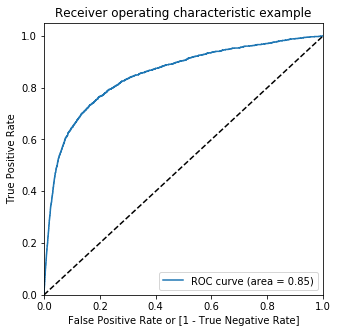

In [459]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [460]:
## Finding Optimal Cutoff Point

In [461]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
mobile_number                                                               
7001454064         0    0.095228          0    1    0    0    0    0    0   
7001929370         0    0.050607          0    1    0    0    0    0    0   
7000952221         0    0.033925          0    1    0    0    0    0    0   
7000752154         0    0.000283          0    1    0    0    0    0    0   
7000346259         0    0.029263          0    1    0    0    0    0    0   

               0.6  0.7  0.8  0.9  
mobile_number                      
7001454064       0    0    0    0  
7001929370       0    0    0    0  
7000952221       0    0    0    0  
7000752154       0    0    0    0  
7000346259       0    0    0    0

In [462]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.104000  1.000000  0.000000
0.1   0.1  0.745190  0.809982  0.737670
0.2   0.2  0.863524  0.667125  0.886320
0.3   0.3  0.904095  0.528388  0.947704
0.4   0.4  0.910190  0.336538  0.976775
0.5   0.5  0.904762  0.167125  0.990381
0.6   0.6  0.900810  0.081044  0.995961
0.7   0.7  0.898476  0.035256  0.998671
0.8   0.8  0.897333  0.016941  0.999522
0.9   0.9  0.896524  0.006410  0.999841


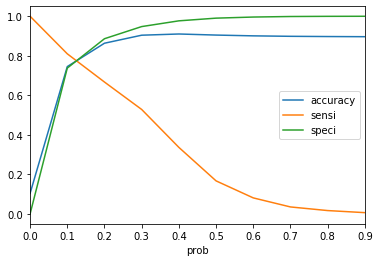

In [463]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

## From the curve above, 0.13 is the optimum point to take it as a cutoff probability.

In [465]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.13 else 0)

y_train_pred_final.head()

Churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
mobile_number                                                               
7001454064         0    0.095228          0    1    0    0    0    0    0   
7001929370         0    0.050607          0    1    0    0    0    0    0   
7000952221         0    0.033925          0    1    0    0    0    0    0   
7000752154         0    0.000283          0    1    0    0    0    0    0   
7000346259         0    0.029263          0    1    0    0    0    0    0   

               0.6  0.7  0.8  0.9  final_predicted  
mobile_number                                       
7001454064       0    0    0    0                0  
7001929370       0    0    0    0                0  
7000952221       0    0    0    0                0  
7000752154       0    0    0    0                0  
7000346259       0    0    0    0                0

In [466]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.7975714285714286

## Logistic Regression - Making predictions on the test set

In [468]:
#scale_cols
X_LS_test[scale_cols] = scaler.transform(X_LS_test[scale_cols])

In [469]:
X_LS_test = X_LS_test[logistic_features]
X_LS_test.head()

onnet_mou_8  offnet_mou_8  loc_og_mou_8  total_og_mou_7  \
mobile_number                                                            
7000912554       -0.491683     -0.645281     -0.576439       -0.840911   
7000409110       -0.488488     -0.684073     -0.632692       -0.845611   
7000903241       -0.002995      1.104758      1.560457        0.563440   
7001270385       -0.257737     -0.232016      0.105302       -0.406232   
7000931357       -0.406015     -0.680565     -0.633833       -0.153003   

               loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_8  total_ic_mou_6  \
mobile_number                                                             
7000912554        -0.571710     -0.568294     -0.286095       -0.487459   
7000409110        -0.561811     -0.692112     -0.198468       -0.704528   
7000903241         0.551760      0.600139      0.022884        0.515141   
7001270385         0.090788     -0.132755     -0.271409        0.242766   
7000931357         0.105151     -0.648024     -0.311674        0.184750   

               total_rech_num_8  total_rech_amt_8  monthly_2g_8       aon  \
mobile_number                                                               
7000912554            -0.643976         -0.438870     -0.376513 -0.559188   
7000409110            -0.320548         -0.780535     -0.376513 -0.491813   
7000903241            -0.212739          0.270624     -0.376513 -1.020287   
7001270385             1.404402         -0.118751     -0.376513  0.014553   
7000931357            -0.859595         -0.734364     -0.376513  0.385117   

               aug_vbc_3g  
mobile_number              
7000912554      -0.401980  
7000409110      -0.401980  
7000903241      -0.401980  
7001270385      -0.401980  
7000931357      -0.357353

In [470]:
X_LS_test_sm = sm.add_constant(X_LS_test)

### Making predictions on the test set

In [471]:
y_ls_test_pred = res.predict(X_LS_test_sm)

In [472]:
y_ls_test_pred[:10]

mobile_number
7000912554    0.231433
7000409110    0.215647
7000903241    0.022492
7001270385    0.012845
7000931357    0.458416
7001809981    0.006850
7001434577    0.071888
7001738563    0.033411
7000826660    0.006142
7000309026    0.115563
dtype: float64

In [473]:
type(y_ls_test_pred)

pandas.core.series.Series

In [474]:
# Converting y_pred to a dataframe which is an array
y_ls_pred_1 = pd.DataFrame(y_ls_test_pred)

In [476]:
y_ls_pred_1.head()

0
mobile_number          
7000912554     0.231433
7000409110     0.215647
7000903241     0.022492
7001270385     0.012845
7000931357     0.458416

In [477]:
# Converting y_test to dataframe
y_ls_test_df = pd.DataFrame(y_ls_test)

In [478]:
y_ls_test_df.head()

Churn
mobile_number       
7000912554         1
7000409110         1
7000903241         0
7001270385         0
7000931357         1

In [479]:
# setting  Mobilenumber to index
y_ls_test_df['mobile_number'] = y_ls_test_df.index

In [480]:
y_ls_test_df.head()

Churn  mobile_number
mobile_number                      
7000912554         1     7000912554
7000409110         1     7000409110
7000903241         0     7000903241
7001270385         0     7001270385
7000931357         1     7000931357

In [481]:
# Removing index for both dataframes to append them side by side 
y_ls_pred_1.reset_index(drop=True, inplace=True)
y_ls_test_df.reset_index(drop=True, inplace=True)

In [482]:
# Appending y_test_df and y_pred_1
y_ls_pred_final = pd.concat([y_ls_test_df, y_ls_pred_1],axis=1)

In [483]:
y_ls_pred_final.head()

Churn  mobile_number         0
0      1     7000912554  0.231433
1      1     7000409110  0.215647
2      0     7000903241  0.022492
3      0     7001270385  0.012845
4      1     7000931357  0.458416

In [484]:
# Renaming the column 
y_ls_pred_final= y_ls_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [486]:
y_ls_pred_final.head()

Churn  mobile_number  Churn_Prob
0      1     7000912554    0.231433
1      1     7000409110    0.215647
2      0     7000903241    0.022492
3      0     7001270385    0.012845
4      1     7000931357    0.458416

In [488]:
y_ls_pred_final['final_predicted'] = y_ls_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.13 else 0)

In [490]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_ls_pred_final.Churn, y_ls_pred_final.final_predicted)

0.7980224419508943

In [491]:
confusion2 = metrics.confusion_matrix(y_ls_pred_final.Churn, y_ls_pred_final.final_predicted )
confusion2

array([[6495, 1583],
       [ 235,  688]], dtype=int64)

## Logistic Regression Train data Accuracy = 0.7975714285714286
## Logistic Regression Test data Accuracy = 0.7980224419508943

## The below are the features which are influencing the Churn

In [492]:
logistic_features

['onnet_mou_8',
 'offnet_mou_8',
 'loc_og_mou_8',
 'total_og_mou_7',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_rech_num_8',
 'total_rech_amt_8',
 'monthly_2g_8',
 'aon',
 'aug_vbc_3g']

In [497]:
# Logistic regression coefficients below to build model equation y = b0 + b1.x1 + b2.x2 for the features
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20986
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5212.9
Date:                Mon, 25 May 2020   Deviance:                       10426.
Time:                        21:57:24   Pearson chi2:                 5.65e+13
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.3230      0.049    -68.427      0.000      -3.418      -3.228
onnet_mou_8         -0.2526      0.061     -4.152      0.000      -0.372      -0.133
offnet_mou_8        -0.2673      0.068     -3.943      0.000      -0.400      -0.134
loc_og_mou_8        -0.4196      0.082     -5.133      0.000      -0.580      -0.259
total_og_mou_7       0.4324      0.039     11.084      0.000       0.356       0.509
loc_ic_mou_7         0.3305      0.067      4.940      0.000       0.199       0.462
loc_ic_mou_8        -1.1893      0.102    -11.682      0.000      -1.389      -0.990
std_ic_mou_8        -0.3145      0.066     -4.766      0.000      -0.444      -0.185
total_ic_mou_6       0.2827      0.042      6.666      0.000       0.200       0.366
total_rech_num_8    -1.1918      0.064    -18.527      0.000      -1.318      -1.066
total_rech_amt_8    -0.6358      0.087     -7.339      0.000      -0.806      -0.466
monthly_2g_8        -0.4056      0.044     -9.271      0.000      -0.491      -0.320
aon                 -0.2300      0.031     -7.521      0.000      -0.290      -0.170
aug_vbc_3g          -0.4500      0.055     -8.149      0.000      -0.558      -0.342
====================================================================================
"""

# PCA - Principles component Analysis

In [498]:
fdata

onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
mobile_number                                                        
7000842753            0.00         0.00         0.00          0.00   
7000701601           57.84        54.68        52.29        453.43   
7001524846          413.69       351.03        35.08         94.66   
7002124215          102.41       132.11        85.14        757.93   
7000887461           48.96        50.66        33.58         85.41   
...                    ...          ...          ...           ...   
7000630859           78.68        29.04       103.24         56.13   
7000661676          423.99       181.83         5.71         39.51   
7001729035          806.73       549.36       775.41        784.76   
7002111859          199.89       174.46         2.46        175.88   
7000498689            0.00         0.00         0.00          0.00   

               offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
mobile_number                                                             
7000842753             0.00          0.00           0.00           0.00   
7000701601           567.16        325.91          16.23          33.49   
7001524846            80.63        136.48           0.00           0.00   
7002124215           896.68        983.39           0.00           0.00   
7000887461            89.36        205.89           0.00           0.00   
...                     ...           ...            ...            ...   
7000630859            28.09         61.44           0.00           0.00   
7000661676            39.81         18.26           0.00           0.00   
7001729035           617.13        595.44           0.00           0.00   
7002111859           277.01        248.33           0.00           0.00   
7000498689             0.00          0.00           0.00           0.00   

               roam_ic_mou_8  roam_og_mou_6  ...  sachet_3g_7  sachet_3g_8  \
mobile_number                                ...                             
7000842753              0.00           0.00  ...            0            0   
7000701601             31.64          23.74  ...            0            0   
7001524846              0.00           0.00  ...            0            0   
7002124215              0.00           0.00  ...            0            0   
7000887461              0.00           0.00  ...            0            1   
...                      ...            ...  ...          ...          ...   
7000630859              0.00           0.00  ...            0            0   
7000661676              0.00           0.00  ...            0            0   
7001729035              0.00           0.00  ...            0            0   
7002111859              0.00           0.00  ...            0            0   
7000498689              0.00           0.00  ...            0            0   

               fb_user_6  fb_user_7  fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  \
mobile_number                                                                  
7000842753           1.0        1.0        1.0   968       30.40        0.00   
7000701601           1.0        1.0        1.0   802       57.74       19.38   
7001524846           1.0        1.0        1.0   315       21.03      910.65   
7002124215           1.0        1.0        1.0   720        0.00        0.00   
7000887461           1.0        1.0        1.0   604       40.45       51.86   
...                  ...        ...        ...   ...         ...         ...   
7000630859           1.0        1.0        1.0   473     1100.43      619.59   
7000661676           1.0        1.0        1.0   820        0.00        0.00   
7001729035           1.0        1.0        1.0  2696      497.45      598.67   
7002111859           1.0        1.0        1.0   328      104.73        0.00   
7000498689           1.0        1.0        1.0   478     1445.74     1151.03   

               jun_vbc_3g  Churn  
mobile_number                     
70

In [499]:
# visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

In [500]:
# Now let's drop the Churn column as it is not a predictor in our data.
dat1 = fdata.drop('Churn', axis =1)

In [559]:
dat1

onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
mobile_number                                                        
7000842753            0.00         0.00         0.00          0.00   
7000701601           57.84        54.68        52.29        453.43   
7001524846          413.69       351.03        35.08         94.66   
7002124215          102.41       132.11        85.14        757.93   
7000887461           48.96        50.66        33.58         85.41   
...                    ...          ...          ...           ...   
7000630859           78.68        29.04       103.24         56.13   
7000661676          423.99       181.83         5.71         39.51   
7001729035          806.73       549.36       775.41        784.76   
7002111859          199.89       174.46         2.46        175.88   
7000498689            0.00         0.00         0.00          0.00   

               offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
mobile_number                                                             
7000842753             0.00          0.00           0.00           0.00   
7000701601           567.16        325.91          16.23          33.49   
7001524846            80.63        136.48           0.00           0.00   
7002124215           896.68        983.39           0.00           0.00   
7000887461            89.36        205.89           0.00           0.00   
...                     ...           ...            ...            ...   
7000630859            28.09         61.44           0.00           0.00   
7000661676            39.81         18.26           0.00           0.00   
7001729035           617.13        595.44           0.00           0.00   
7002111859           277.01        248.33           0.00           0.00   
7000498689             0.00          0.00           0.00           0.00   

               roam_ic_mou_8  roam_og_mou_6  ...  sachet_3g_6  sachet_3g_7  \
mobile_number                                ...                             
7000842753              0.00           0.00  ...            0            0   
7000701601             31.64          23.74  ...            0            0   
7001524846              0.00           0.00  ...            0            0   
7002124215              0.00           0.00  ...            0            0   
7000887461              0.00           0.00  ...            0            0   
...                      ...            ...  ...          ...          ...   
7000630859              0.00           0.00  ...            0            0   
7000661676              0.00           0.00  ...            0            0   
7001729035              0.00           0.00  ...            0            0   
7002111859              0.00           0.00  ...            0            0   
7000498689              0.00           0.00  ...            1            0   

               sachet_3g_8  fb_user_6  fb_user_7  fb_user_8   aon  aug_vbc_3g  \
mobile_number                                                                   
7000842753               0        1.0        1.0        1.0   968       30.40   
7000701601               0        1.0        1.0        1.0   802       57.74   
7001524846               0        1.0        1.0        1.0   315       21.03   
7002124215               0        1.0        1.0        1.0   720        0.00   
7000887461               1        1.0        1.0        1.0   604       40.45   
...                    ...        ...        ...        ...   ...         ...   
7000630859               0        1.0        1.0        1.0   473     1100.43   
7000661676               0        1.0        1.0        1.0   820        0.00   
7001729035               0        1.0        1.0        1.0  2696      497.45   
7002111859               0        1.0        1.0        1.0   328      104.73   
7000498689               0        1.0        1.0        1.0   478     1445.74   

               jul_vbc_3g  jun_vbc_3g  
mobile_number      

In [502]:
## Let's scale the data with 4 columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dat2 =scaler.fit_transform(dat1)

In [503]:
dat2

array([[-0.56738946, -0.55797315, -0.51067108, ..., -0.32957156,
        -0.40328736, -0.13755729],
       [-0.44155095, -0.44405316, -0.39661059, ..., -0.2646259 ,
        -0.35959313, -0.3354322 ],
       [ 0.33264744,  0.1733607 , -0.43415087, ..., -0.35182981,
         1.64986834, -0.08726068],
       ...,
       [ 1.18775756,  0.58656026,  1.18073539, ...,  0.77989694,
         0.94647679,  1.06917733],
       [-0.13250252, -0.19450421, -0.50530507, ..., -0.15300204,
        -0.40328736, -0.38040159],
       [-0.56738946, -0.55797315, -0.51067108, ...,  3.03254202,
         2.1918302 ,  2.43481658]])

In [504]:
dat2.max()

148.28748789372148

In [505]:
# Check the current variance of each column
100*dat1.var()/sum(dat1.var())

onnet_mou_6     1.205972e+00
onnet_mou_7     1.315118e+00
onnet_mou_8     1.199705e+00
offnet_mou_6    1.329016e+00
offnet_mou_7    1.420892e+00
                    ...     
fb_user_8       2.949861e-07
aon             5.235187e+00
aug_vbc_3g      1.011590e+00
jul_vbc_3g      1.122967e+00
jun_vbc_3g      9.913176e-01
Length: 97, dtype: float64

In [506]:
round((dat1.var()/sum(dat1.var()))*100,6)

onnet_mou_6     1.205972
onnet_mou_7     1.315118
onnet_mou_8     1.199705
offnet_mou_6    1.329016
offnet_mou_7    1.420892
                  ...   
fb_user_8       0.000000
aon             5.235187
aug_vbc_3g      1.011590
jul_vbc_3g      1.122967
jun_vbc_3g      0.991318
Length: 97, dtype: float64

In [507]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver = 'randomized', random_state = 42)
pca.fit(dat2)
# Eigen Value Decomposition

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [508]:
#first coponent of the first vector obtained from pca.components_
pca.components_

array([[ 1.62373273e-01,  1.75439797e-01,  1.68893512e-01, ...,
        -9.22503379e-02, -9.92910340e-02, -9.45245787e-02],
       [-4.80217335e-03, -3.46076501e-03,  6.54962837e-03, ...,
         1.78097816e-01,  1.80002881e-01,  1.74321969e-01],
       [ 7.80395546e-02,  9.64508913e-02,  1.03838477e-01, ...,
         3.45946088e-02,  3.22690849e-02,  2.85289940e-02],
       ...,
       [ 0.00000000e+00, -4.39933723e-15, -5.78697295e-15, ...,
         8.80482229e-17, -3.38798441e-17,  6.40157648e-18],
       [ 0.00000000e+00,  1.45127791e-15, -1.59131864e-15, ...,
        -1.36360816e-16,  2.58655322e-16, -1.43965155e-16],
       [-0.00000000e+00,  1.28293114e-15, -1.00198299e-15, ...,
         1.37433048e-16, -2.18377099e-16,  1.21239625e-16]])

In [509]:
#What is the variance explained by the first principal component
pca.explained_variance_ratio_

array([1.06250675e-01, 9.02315946e-02, 7.05063342e-02, 5.84556326e-02,
       3.89677610e-02, 3.37593283e-02, 3.25486236e-02, 3.05164715e-02,
       2.70496519e-02, 2.54259433e-02, 2.26155183e-02, 2.19577303e-02,
       2.00266114e-02, 1.97878278e-02, 1.93821243e-02, 1.80721324e-02,
       1.69319816e-02, 1.58422960e-02, 1.52090767e-02, 1.50587405e-02,
       1.46095420e-02, 1.39961553e-02, 1.25042875e-02, 1.14923669e-02,
       1.05796992e-02, 1.05408306e-02, 9.93794627e-03, 9.76124348e-03,
       9.56201131e-03, 8.76124169e-03, 8.17164547e-03, 7.90293945e-03,
       7.71717240e-03, 7.48708252e-03, 7.26707198e-03, 6.58816175e-03,
       6.49316731e-03, 6.20293789e-03, 5.91778496e-03, 5.85309743e-03,
       5.70252117e-03, 5.56187971e-03, 5.30493152e-03, 5.03859081e-03,
       4.69698670e-03, 4.52674546e-03, 4.46375337e-03, 4.38210285e-03,
       4.24102582e-03, 4.17511031e-03, 4.05722325e-03, 3.83965968e-03,
       3.72967147e-03, 3.55792270e-03, 3.53075565e-03, 3.49467144e-03,
      

In [512]:
len(pca.explained_variance_ratio_)

97

In [511]:
#Plotting the scree plot
%matplotlib inline

In [516]:
pca_range = [x for x in range(1,98)]

Text(0, 0.5, 'Cumulative Variance')

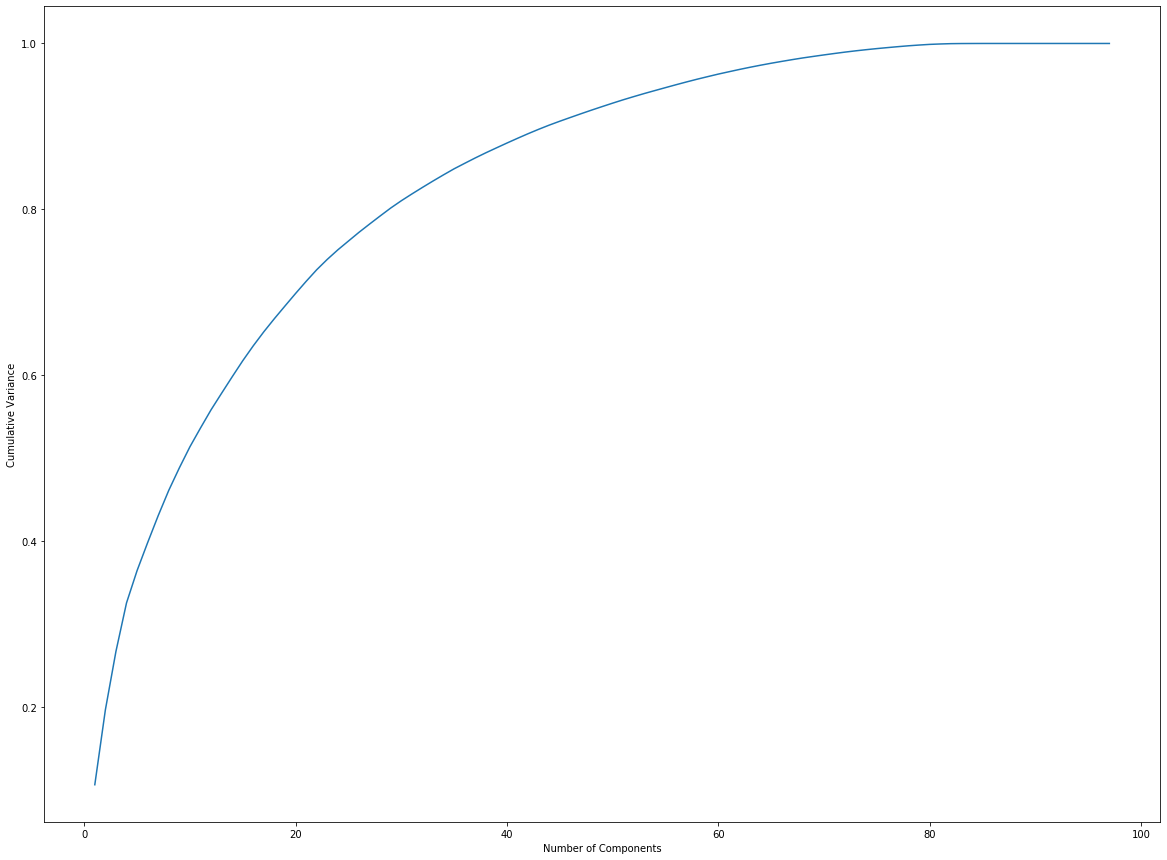

In [520]:
fig = plt.figure(figsize = (20,15))
plt.plot(pca_range, np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

In [521]:
# The number of PCs we can go here are 30 as it explains most of the % of data.

### Run the PCA with the components 

In [528]:
#Finally let's go ahead and do dimenstionality reduction
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components = 30)

In [529]:
# Transform the data here
df_pca = pca_final.fit_transform(dat2)
df_pca.shape

(30001, 30)

## Logistic Model building with PCA

In [588]:
y_train = fdata["Churn"]
y_train

mobile_number
7000842753    1
7000701601    1
7001524846    0
7002124215    0
7000887461    0
             ..
7000630859    1
7000661676    0
7001729035    0
7002111859    0
7000498689    0
Name: Churn, Length: 30001, dtype: int64

In [530]:
df_pca

array([[-2.74912186,  1.26675554, -2.58834007, ..., -0.05162013,
        -0.32651341,  0.01952215],
       [ 2.5250268 ,  4.61086379, -1.66489885, ..., -2.08345846,
        -2.46467503, -0.28454888],
       [-1.06430384, -1.68072557, -0.40136127, ..., -0.55571322,
        -0.59339372, -0.23873339],
       ...,
       [ 3.2404898 ,  2.15755961,  0.02048522, ..., -0.1955054 ,
         0.41684052, -0.09372747],
       [ 0.64763244,  0.718175  , -1.72511897, ...,  0.05103606,
        -0.78807097,  0.17141617],
       [-5.67696102,  5.20733382,  0.67546391, ..., -0.63592732,
        -0.25665187, -0.00935251]])

In [552]:
# Create Dataframe with PCA Data
pc_columns = ["PC"+str(x) for x in range(1,31)]
pc_columns
pc  = pd.DataFrame(df_pca,columns=pc_columns)

In [553]:
pc

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     -2.749122  1.266756 -2.588340 -2.228014 -0.445177  0.169602  1.289097   
1      2.525027  4.610864 -1.664899  1.400013  4.179922  0.435184  0.972462   
2     -1.064304 -1.680726 -0.401361 -0.710834 -0.102885 -0.791460 -0.265332   
3      2.266423 -1.334036  0.547656 -1.365895 -0.481693 -0.233578  0.243367   
4     -2.117527  1.125429 -1.201407 -0.699718 -1.098037  0.471114  1.336813   
...         ...       ...       ...       ...       ...       ...       ...   
29996 -2.441217  3.549513 -1.907639 -0.212296 -0.823691 -0.127763 -0.057767   
29997 -2.103723 -3.088560 -0.332703  0.693215  0.620237 -1.244926 -1.195078   
29998  3.240490  2.157560  0.020485  2.881883 -1.126546 -0.805634 -0.039388   
29999  0.647632  0.718175 -1.725119  3.171057 -0.641753  0.454899 -0.892231   
30000 -5.676961  5.207334  0.675464 -2.838169 -0.870642 -0.300728 -0.204784   

            PC8       PC9      PC10  ...      PC21      PC22      PC23  \
0      0.004013 -0.764897 -0.235940  ... -0.092968 -0.482991  0.311553   
1     -0.602868 -0.333544 -0.422734  ...  2.721573 -0.956195  4.835356   
2     -0.150691  0.057726  0.232245  ... -0.582614  0.601950  0.109628   
3      0.954866 -0.185856 -1.089939  ... -0.522764 -0.610015  0.774359   
4      0.443040 -0.602048  0.206823  ... -0.691273  0.674655 -0.707581   
...         ...       ...       ...  ...       ...       ...       ...   
29996  0.237981 -1.099303 -0.535782  ...  0.336985  0.031667 -0.869988   
29997 -0.319679  1.275966  0.426544  ...  0.840103 -0.175232 -0.869274   
29998 -2.969644 -0.546201  0.946152  ... -0.516914  1.317282 -1.316917   
29999  1.930525  0.843516 -2.144928  ... -0.015926  0.070994  0.524326   
30000 -0.005986 -2.237364 -0.015116  ... -0.113354 -0.960491 -2.122467   

           PC24      PC25      PC26      PC27      PC28      PC29      PC30  
0      0.184613  0.021289 -0.173981 -0.471478 -0.051620 -0.326513  0.019522  
1     -0.356953  0.677297  0.672251  2.574822 -2.083458 -2.464675 -0.284549  
2     -1.076166 -0.295593  0.982965  0.036820 -0.555713 -0.593394 -0.238733  
3      0.102937 -0.100765  0.258828  0.077082 -0.326543 -0.116100 -0.258602  
4      0.916721  0.113267 -1.211781 -0.520394  0.162351 -0.463883  0.257638  
...         ...       ...       ...       ...       ...       ...       ...  
29996  0.226735 -0.804154  0.098716  0.845963 -0.649893 -0.673905  0.083342  
29997 -0.936022 -0.620929  0.842611 -0.389187 -0.363250  0.118242  0.186017  
29998 -0.656539 -0.482986  0.246244  1.323338 -0.195505  0.416841 -0.093727  
29999  0.416464  0.137918 -0.443936 -1.070472  0.051036 -0.788071  0.171416  
30000  1.814843 -0.969393 -1.077273  1.639997 -0.635927 -0.256652 -0.009353  

[30001 rows x 30 columns]

In [555]:
pc_withconstants = sm.add_constant(pc)

In [560]:
pc_withconstants["mobile_number"] = dat1.index

In [591]:
pc_withconstants.set_index("mobile_number")

const       PC1       PC2       PC3       PC4       PC5  \
mobile_number                                                            
7000842753       1.0 -2.749122  1.266756 -2.588340 -2.228014 -0.445177   
7000701601       1.0  2.525027  4.610864 -1.664899  1.400013  4.179922   
7001524846       1.0 -1.064304 -1.680726 -0.401361 -0.710834 -0.102885   
7002124215       1.0  2.266423 -1.334036  0.547656 -1.365895 -0.481693   
7000887461       1.0 -2.117527  1.125429 -1.201407 -0.699718 -1.098037   
...              ...       ...       ...       ...       ...       ...   
7000630859       1.0 -2.441217  3.549513 -1.907639 -0.212296 -0.823691   
7000661676       1.0 -2.103723 -3.088560 -0.332703  0.693215  0.620237   
7001729035       1.0  3.240490  2.157560  0.020485  2.881883 -1.126546   
7002111859       1.0  0.647632  0.718175 -1.725119  3.171057 -0.641753   
7000498689       1.0 -5.676961  5.207334  0.675464 -2.838169 -0.870642   

                    PC6       PC7       PC8       PC9  ...      PC21  \
mobile_number                                          ...             
7000842753     0.169602  1.289097  0.004013 -0.764897  ... -0.092968   
7000701601     0.435184  0.972462 -0.602868 -0.333544  ...  2.721573   
7001524846    -0.791460 -0.265332 -0.150691  0.057726  ... -0.582614   
7002124215    -0.233578  0.243367  0.954866 -0.185856  ... -0.522764   
7000887461     0.471114  1.336813  0.443040 -0.602048  ... -0.691273   
...                 ...       ...       ...       ...  ...       ...   
7000630859    -0.127763 -0.057767  0.237981 -1.099303  ...  0.336985   
7000661676    -1.244926 -1.195078 -0.319679  1.275966  ...  0.840103   
7001729035    -0.805634 -0.039388 -2.969644 -0.546201  ... -0.516914   
7002111859     0.454899 -0.892231  1.930525  0.843516  ... -0.015926   
7000498689    -0.300728 -0.204784 -0.005986 -2.237364  ... -0.113354   

                   PC22      PC23      PC24      PC25      PC26      PC27  \
mobile_number                                                               
7000842753    -0.482991  0.311553  0.184613  0.021289 -0.173981 -0.471478   
7000701601    -0.956195  4.835356 -0.356953  0.677297  0.672251  2.574822   
7001524846     0.601950  0.109628 -1.076166 -0.295593  0.982965  0.036820   
7002124215    -0.610015  0.774359  0.102937 -0.100765  0.258828  0.077082   
7000887461     0.674655 -0.707581  0.916721  0.113267 -1.211781 -0.520394   
...                 ...       ...       ...       ...       ...       ...   
7000630859     0.031667 -0.869988  0.226735 -0.804154  0.098716  0.845963   
7000661676    -0.175232 -0.869274 -0.936022 -0.620929  0.842611 -0.389187   
7001729035     1.317282 -1.316917 -0.656539 -0.482986  0.246244  1.323338   
7002111859     0.070994  0.524326  0.416464  0.137918 -0.443936 -1.070472   
7000498689    -0.960491 -2.122467  1.814843 -0.969393 -1.077273  1.639997   

                   PC28      PC29      PC30  
mobile_number                                
7000842753    -0.051620 -0.326513  0.019522  
7000701601    -2.083458 -2.464675 -0.284549  
7001524846    -0.555713 -0.593394 -0.238733  
7002124215    -0.326543 -0.116100 -0.258602  
7000887461     0.162351 -0.463883  0.257638  
...                 ...       ...       ...  
7000630859    -0.649893 -0.673905  0.083342  
7000661676    -0.363250  0.118242  0.186017  
7001729035    -0.195505  0.416841 -0.093727  
7002111859     0.051036 -0.788071  0.171416  
7000498689    -0.635927 -0.256652 -0.009353  

[30001 rows x 31 columns]

In [593]:
y_train2 = y_train.values.reshape(-1,1)

In [594]:
# Logistic regression model
logm = sm.GLM(y_train2,pc_withconstants, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                30001
Model:                            GLM   Df Residuals:                    29970
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7450.6
Date:                Mon, 25 May 2020   Deviance:                       14901.
Time:                        23:12:23   Pearson chi2:                 3.36e+09
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -131.7992    219.854     -0.599      0.549    -562.705     299.106
PC1              -0.0686      0.013     -5.427      0.000      -0.093      -0.044
PC2              -0.2274      0.013    -18.104      0.000      -0.252      -0.203
PC3              -0.5018      0.019    -25.832      0.000      -0.540      -0.464
PC4              -0.1853      0.013    -14.078      0.000      -0.211      -0.159
PC5              -0.0042      0.015     -0.282      0.778      -0.033       0.025
PC6               0.0442      0.015      3.034      0.002       0.016       0.073
PC7               0.3093      0.017     18.022      0.000       0.276       0.343
PC8               0.1479      0.019      7.928      0.000       0.111       0.184
PC9              -0.0377      0.018     -2.045      0.041      -0.074      -0.002
PC10             -0.1461      0.021     -6.800      0.000      -0.188      -0.104
PC11              0.1281      0.020      6.463      0.000       0.089       0.167
PC12             -0.3735      0.020    -18.714      0.000      -0.413      -0.334
PC13              0.6626      0.019     34.213      0.000       0.625       0.701
PC14             -0.0051      0.020     -0.258      0.796      -0.044       0.033
PC15              0.1303      0.023      5.692      0.000       0.085       0.175
PC16             -0.1372      0.026     -5.256      0.000      -0.188      -0.086
PC17              0.1080      0.023      4.644      0.000       0.062       0.154
PC18              0.1161      0.025      4.609      0.000       0.067       0.165
PC19             -0.1516      0.026     -5.868      0.000      -0.202      -0.101
PC20              0.2493      0.028      8.822      0.000       0.194       0.305
PC21             -0.3190      0.028    -11.474      0.000      -0.374      -0.265
PC22              0.5133      0.025     20.325      0.000       0.464       0.563
PC23             -0.0432      0.026     -1.690      0.091      -0.093       0.007
PC24             -0.2223      0.023     -9.603      0.000      -0.268      -0.177
PC25              0.1812      0.023      7.866      0.000       0.136       0.226
PC26             -0.0091      0.023     -0.403      0.687      -0.053       0.035
PC27             -0.0881      0.029     -3.073      0.002      -0.144      -0.032
PC28             -0.4196      0.030    -13.990      0.000      -0.478      -0.361
PC29             -0.1652      0.025     -6.530      0.000      -0.215      -0.116
PC30             -0.2834      0.043     -6.577      0.000      -0.368      -0.199
mobile_number  1.836e-08   3.14e-08      0.585      0.559   -4.32e-08    7.99e-08
=================================================================================
"""

In [599]:
pc_withconstants.set_index("mobile_number")

const       PC1       PC2       PC3       PC4       PC5  \
mobile_number                                                            
7000842753       1.0 -2.749122  1.266756 -2.588340 -2.228014 -0.445177   
7000701601       1.0  2.525027  4.610864 -1.664899  1.400013  4.179922   
7001524846       1.0 -1.064304 -1.680726 -0.401361 -0.710834 -0.102885   
7002124215       1.0  2.266423 -1.334036  0.547656 -1.365895 -0.481693   
7000887461       1.0 -2.117527  1.125429 -1.201407 -0.699718 -1.098037   
...              ...       ...       ...       ...       ...       ...   
7000630859       1.0 -2.441217  3.549513 -1.907639 -0.212296 -0.823691   
7000661676       1.0 -2.103723 -3.088560 -0.332703  0.693215  0.620237   
7001729035       1.0  3.240490  2.157560  0.020485  2.881883 -1.126546   
7002111859       1.0  0.647632  0.718175 -1.725119  3.171057 -0.641753   
7000498689       1.0 -5.676961  5.207334  0.675464 -2.838169 -0.870642   

                    PC6       PC7       PC8       PC9  ...      PC21  \
mobile_number                                          ...             
7000842753     0.169602  1.289097  0.004013 -0.764897  ... -0.092968   
7000701601     0.435184  0.972462 -0.602868 -0.333544  ...  2.721573   
7001524846    -0.791460 -0.265332 -0.150691  0.057726  ... -0.582614   
7002124215    -0.233578  0.243367  0.954866 -0.185856  ... -0.522764   
7000887461     0.471114  1.336813  0.443040 -0.602048  ... -0.691273   
...                 ...       ...       ...       ...  ...       ...   
7000630859    -0.127763 -0.057767  0.237981 -1.099303  ...  0.336985   
7000661676    -1.244926 -1.195078 -0.319679  1.275966  ...  0.840103   
7001729035    -0.805634 -0.039388 -2.969644 -0.546201  ... -0.516914   
7002111859     0.454899 -0.892231  1.930525  0.843516  ... -0.015926   
7000498689    -0.300728 -0.204784 -0.005986 -2.237364  ... -0.113354   

                   PC22      PC23      PC24      PC25      PC26      PC27  \
mobile_number                                                               
7000842753    -0.482991  0.311553  0.184613  0.021289 -0.173981 -0.471478   
7000701601    -0.956195  4.835356 -0.356953  0.677297  0.672251  2.574822   
7001524846     0.601950  0.109628 -1.076166 -0.295593  0.982965  0.036820   
7002124215    -0.610015  0.774359  0.102937 -0.100765  0.258828  0.077082   
7000887461     0.674655 -0.707581  0.916721  0.113267 -1.211781 -0.520394   
...                 ...       ...       ...       ...       ...       ...   
7000630859     0.031667 -0.869988  0.226735 -0.804154  0.098716  0.845963   
7000661676    -0.175232 -0.869274 -0.936022 -0.620929  0.842611 -0.389187   
7001729035     1.317282 -1.316917 -0.656539 -0.482986  0.246244  1.323338   
7002111859     0.070994  0.524326  0.416464  0.137918 -0.443936 -1.070472   
7000498689    -0.960491 -2.122467  1.814843 -0.969393 -1.077273  1.639997   

                   PC28      PC29      PC30  
mobile_number                                
7000842753    -0.051620 -0.326513  0.019522  
7000701601    -2.083458 -2.464675 -0.284549  
7001524846    -0.555713 -0.593394 -0.238733  
7002124215    -0.326543 -0.116100 -0.258602  
7000887461     0.162351 -0.463883  0.257638  
...                 ...       ...       ...  
7000630859    -0.649893 -0.673905  0.083342  
7000661676    -0.363250  0.118242  0.186017  
7001729035    -0.195505  0.416841 -0.093727  
7002111859     0.051036 -0.788071  0.171416  
7000498689    -0.635927 -0.256652 -0.009353  

[30001 rows x 31 columns]

In [600]:
# Getting the predicted values on the train set
y_train_pred = res.predict(pc_withconstants)
y_train_pred[:10]

0    0.198663
1    0.037229
2    0.120324
3    0.029638
4    0.034603
5    0.278091
6    0.102777
7    0.158342
8    0.477127
9    0.080997
dtype: float64

In [597]:
#y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

0    0.198663
1    0.037229
2    0.120324
3    0.029638
4    0.034603
5    0.278091
6    0.102777
7    0.158342
8    0.477127
9    0.080997
dtype: float64

const       PC1       PC2       PC3       PC4       PC5       PC6  \
0        1.0 -2.749122  1.266756 -2.588340 -2.228014 -0.445177  0.169602   
1        1.0  2.525027  4.610864 -1.664899  1.400013  4.179922  0.435184   
2        1.0 -1.064304 -1.680726 -0.401361 -0.710834 -0.102885 -0.791460   
3        1.0  2.266423 -1.334036  0.547656 -1.365895 -0.481693 -0.233578   
4        1.0 -2.117527  1.125429 -1.201407 -0.699718 -1.098037  0.471114   
...      ...       ...       ...       ...       ...       ...       ...   
29996    1.0 -2.441217  3.549513 -1.907639 -0.212296 -0.823691 -0.127763   
29997    1.0 -2.103723 -3.088560 -0.332703  0.693215  0.620237 -1.244926   
29998    1.0  3.240490  2.157560  0.020485  2.881883 -1.126546 -0.805634   
29999    1.0  0.647632  0.718175 -1.725119  3.171057 -0.641753  0.454899   
30000    1.0 -5.676961  5.207334  0.675464 -2.838169 -0.870642 -0.300728   

            PC7       PC8       PC9  ...      PC22      PC23      PC24  \
0      1.289097  0.004013 -0.764897  ... -0.482991  0.311553  0.184613   
1      0.972462 -0.602868 -0.333544  ... -0.956195  4.835356 -0.356953   
2     -0.265332 -0.150691  0.057726  ...  0.601950  0.109628 -1.076166   
3      0.243367  0.954866 -0.185856  ... -0.610015  0.774359  0.102937   
4      1.336813  0.443040 -0.602048  ...  0.674655 -0.707581  0.916721   
...         ...       ...       ...  ...       ...       ...       ...   
29996 -0.057767  0.237981 -1.099303  ...  0.031667 -0.869988  0.226735   
29997 -1.195078 -0.319679  1.275966  ... -0.175232 -0.869274 -0.936022   
29998 -0.039388 -2.969644 -0.546201  ...  1.317282 -1.316917 -0.656539   
29999 -0.892231  1.930525  0.843516  ...  0.070994  0.524326  0.416464   
30000 -0.204784 -0.005986 -2.237364  ... -0.960491 -2.122467  1.814843   

           PC25      PC26      PC27      PC28      PC29      PC30  \
0      0.021289 -0.173981 -0.471478 -0.051620 -0.326513  0.019522   
1      0.677297  0.672251  2.574822 -2.083458 -2.464675 -0.284549   
2     -0.295593  0.982965  0.036820 -0.555713 -0.593394 -0.238733   
3     -0.100765  0.258828  0.077082 -0.326543 -0.116100 -0.258602   
4      0.113267 -1.211781 -0.520394  0.162351 -0.463883  0.257638   
...         ...       ...       ...       ...       ...       ...   
29996 -0.804154  0.098716  0.845963 -0.649893 -0.673905  0.083342   
29997 -0.620929  0.842611 -0.389187 -0.363250  0.118242  0.186017   
29998 -0.482986  0.246244  1.323338 -0.195505  0.416841 -0.093727   
29999  0.137918 -0.443936 -1.070472  0.051036 -0.788071  0.171416   
30000 -0.969393 -1.077273  1.639997 -0.635927 -0.256652 -0.009353   

       mobile_number  
0         7000842753  
1         7000701601  
2         7001524846  
3         7002124215  
4         7000887461  
...              ...  
29996     7000630859  
29997     7000661676  
29998     7001729035  
29999     7002111859  
30000     7000498689  

[30001 rows x 32 columns]

In [605]:
##### Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_final2 = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred.values})
y_train_pred_final2['mobile_number'] = pc_withconstants["mobile_number"]
y_train_pred_final2.head()

Churn  Churn_Prob  mobile_number
0      1    0.198663     7000842753
1      1    0.037229     7000701601
2      0    0.120324     7001524846
3      0    0.029638     7002124215
4      0    0.034603     7000887461

In [606]:
##Finding Optimal Cutoff Point

In [607]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final2[i]= y_train_pred_final2.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
mobile_number                                                               
7001454064         0    0.095228          0    1    0    0    0    0    0   
7001929370         0    0.050607          0    1    0    0    0    0    0   
7000952221         0    0.033925          0    1    0    0    0    0    0   
7000752154         0    0.000283          0    1    0    0    0    0    0   
7000346259         0    0.029263          0    1    0    0    0    0    0   

               0.6  0.7  0.8  0.9  final_predicted  
mobile_number                                       
7001454064       0    0    0    0                0  
7001929370       0    0    0    0                0  
7000952221       0    0    0    0                0  
7000752154       0    0    0    0                0  
7000346259       0    0    0    0                0

In [608]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final2.Churn, y_train_pred_final2[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.103563  1.000000  0.000000
0.1   0.1  0.754208  0.796266  0.749349
0.2   0.2  0.870704  0.635018  0.897933
0.3   0.3  0.904070  0.503058  0.950398
0.4   0.4  0.909970  0.351143  0.974530
0.5   0.5  0.905003  0.186675  0.987990
0.6   0.6  0.901203  0.091407  0.994757
0.7   0.7  0.899137  0.043128  0.998029
0.8   0.8  0.897870  0.019955  0.999294
0.9   0.9  0.897103  0.007724  0.999851


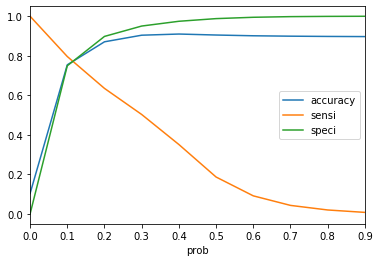

In [609]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [611]:
#### From the curve above, 0.13 is the optimum point to take it as a cutoff probability.
y_train_pred_final2['final_predicted'] = y_train_pred_final2.Churn_Prob.map( lambda x: 1 if x > 0.13 else 0)
y_train_pred_final2.head()

Churn  Churn_Prob  mobile_number  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0      1    0.198663     7000842753    1    1    0    0    0    0    0    0   
1      1    0.037229     7000701601    1    0    0    0    0    0    0    0   
2      0    0.120324     7001524846    1    1    0    0    0    0    0    0   
3      0    0.029638     7002124215    1    0    0    0    0    0    0    0   
4      0    0.034603     7000887461    1    0    0    0    0    0    0    0   

   0.8  0.9  final_predicted  
0    0    0                1  
1    0    0                0  
2    0    0                0  
3    0    0                0  
4    0    0                0

In [612]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final2.Churn, y_train_pred_final2.final_predicted)

0.8062064597846739

## Logistic Regression with PCA and without train / test split the accuracy 80%

# 3. Decision Tree Model building

In [624]:
X_LS_train = X_LS_train[logistic_features]
X_LS_test = X_LS_test[logistic_features]

In [623]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_LS_train, y_ls_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [625]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_LS_test)

# Printing classification report
print(classification_report(y_ls_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      8078
           1       0.68      0.36      0.47       923

    accuracy                           0.92      9001
   macro avg       0.81      0.67      0.71      9001
weighted avg       0.91      0.92      0.91      9001



In [619]:
logistic_features

['onnet_mou_8',
 'offnet_mou_8',
 'loc_og_mou_8',
 'total_og_mou_7',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_rech_num_8',
 'total_rech_amt_8',
 'monthly_2g_8',
 'aon',
 'aug_vbc_3g']

In [626]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_ls_test,y_pred_default))
print(accuracy_score(y_ls_test,y_pred_default))

[[7923  155]
 [ 590  333]]
0.9172314187312521


In [627]:
### Plotting the Decision Tree

In [628]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz



C:\Users\Sirisha\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [630]:
features = logistic_features

In [631]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

InvocationException: GraphViz's executables not found